# Importing the Dataset

In [2]:
import pandas as pd

In [2]:
df = pd.read_csv('FINAL_CLEAN_FILE.csv')
df.head()

VAERS_ID    SYMPTOM         ASSIGNED_GROUP SEVERITY_LEVEL  DIED  L_THREAT  \
0    916600  Dysphagia  Difficulty swallowing           MILD   0.0       0.0   
1    917168  Dysphagia  Difficulty swallowing           MILD   0.0       0.0   
2    918386  Dysphagia  Difficulty swallowing           MILD   0.0       0.0   
3    918393  Dysphagia  Difficulty swallowing           MILD   0.0       0.0   
4    918479  Dysphagia  Difficulty swallowing           MILD   0.0       0.0   

   HOSPITAL  AGE_YRS AGE_GROUP  OTHER_MEDS  ...  VAX_SITE_RA  18-25  26-35  \
0       0.0     33.0     26-35         0.0  ...          0.0      0      1   
1       0.0     64.0     56-65         1.0  ...          1.0      0      0   
2       0.0     62.0     56-65         1.0  ...          1.0      0      0   
3       0.0     62.0     56-65         1.0  ...          1.0      0      0   
4       0.0     37.0     36-45         1.0  ...          1.0      0      0   

   36-45  46-55  56-65  66-75  76-85  86-95  96 +  
0      0      0      0      0      0      0     0  
1      0      0      1      0      0      0     0  
2      0      0      1      0      0      0     0  
3      0      0      1      0      0      0     0  
4      1      0      0      0      0      0     0  

[5 rows x 32 columns]

The columns in the dataset are given as:

In [3]:
df.columns

Index(['VAERS_ID', 'SYMPTOM', 'ASSIGNED_GROUP', 'SEVERITY_LEVEL', 'DIED',
       'L_THREAT', 'HOSPITAL', 'AGE_YRS', 'AGE_GROUP', 'OTHER_MEDS', 'CUR_ILL',
       'HISTORY', 'PRIOR_VAX', 'ALLERGIES', 'F', 'M', 'JANSSEN', 'MODERNA',
       'PFIZER', 'VAX_DOSE_SERIES_1', 'VAX_DOSE_SERIES_2', 'VAX_SITE_LA',
       'VAX_SITE_RA', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75',
       '76-85', '86-95', '96 +'],
      dtype='object')

The target column is 'DIED' which represents if the patient has died due to symptom faced from vaccination. The total number of patients is given as:

In [4]:
df.count()

VAERS_ID             26482
SYMPTOM              26482
ASSIGNED_GROUP       26482
SEVERITY_LEVEL       26482
DIED                 26482
L_THREAT             26482
HOSPITAL             26482
AGE_YRS              26482
AGE_GROUP            26482
OTHER_MEDS           26482
CUR_ILL              26482
HISTORY              26482
PRIOR_VAX            26482
ALLERGIES            26482
F                    26482
M                    26482
JANSSEN              26482
MODERNA              26482
PFIZER               26482
VAX_DOSE_SERIES_1    26482
VAX_DOSE_SERIES_2    26482
VAX_SITE_LA          26482
VAX_SITE_RA          26482
18-25                26482
26-35                26482
36-45                26482
46-55                26482
56-65                26482
66-75                26482
76-85                26482
86-95                26482
96 +                 26482
dtype: int64

Among these many people the number of deaths are:

In [5]:
df[df['DIED'] == 1].count()

VAERS_ID             563
SYMPTOM              563
ASSIGNED_GROUP       563
SEVERITY_LEVEL       563
DIED                 563
L_THREAT             563
HOSPITAL             563
AGE_YRS              563
AGE_GROUP            563
OTHER_MEDS           563
CUR_ILL              563
HISTORY              563
PRIOR_VAX            563
ALLERGIES            563
F                    563
M                    563
JANSSEN              563
MODERNA              563
PFIZER               563
VAX_DOSE_SERIES_1    563
VAX_DOSE_SERIES_2    563
VAX_SITE_LA          563
VAX_SITE_RA          563
18-25                563
26-35                563
36-45                563
46-55                563
56-65                563
66-75                563
76-85                563
86-95                563
96 +                 563
dtype: int64

Therefore, the total number of deaths is 563, which is around 2%. Now we need to check the correlation between each of the column and the target column using CHI-SQUARE TEST but before that we need to convert the data from String to frequency table and appropriate. That is, we need to create the CONTINGENCY TABLE.

# Sample CHI-SQUARE Test

In [6]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

contingency_table = pd.crosstab(df['SYMPTOM'], df['DIED'])
contingency_table.head()

DIED                       0.0  1.0
SYMPTOM                            
Abdomen crushing             1    0
Abdominal discomfort       161    3
Abdominal distension        36    2
Abdominal injury             0    1
Abdominal lymphadenopathy    1    0

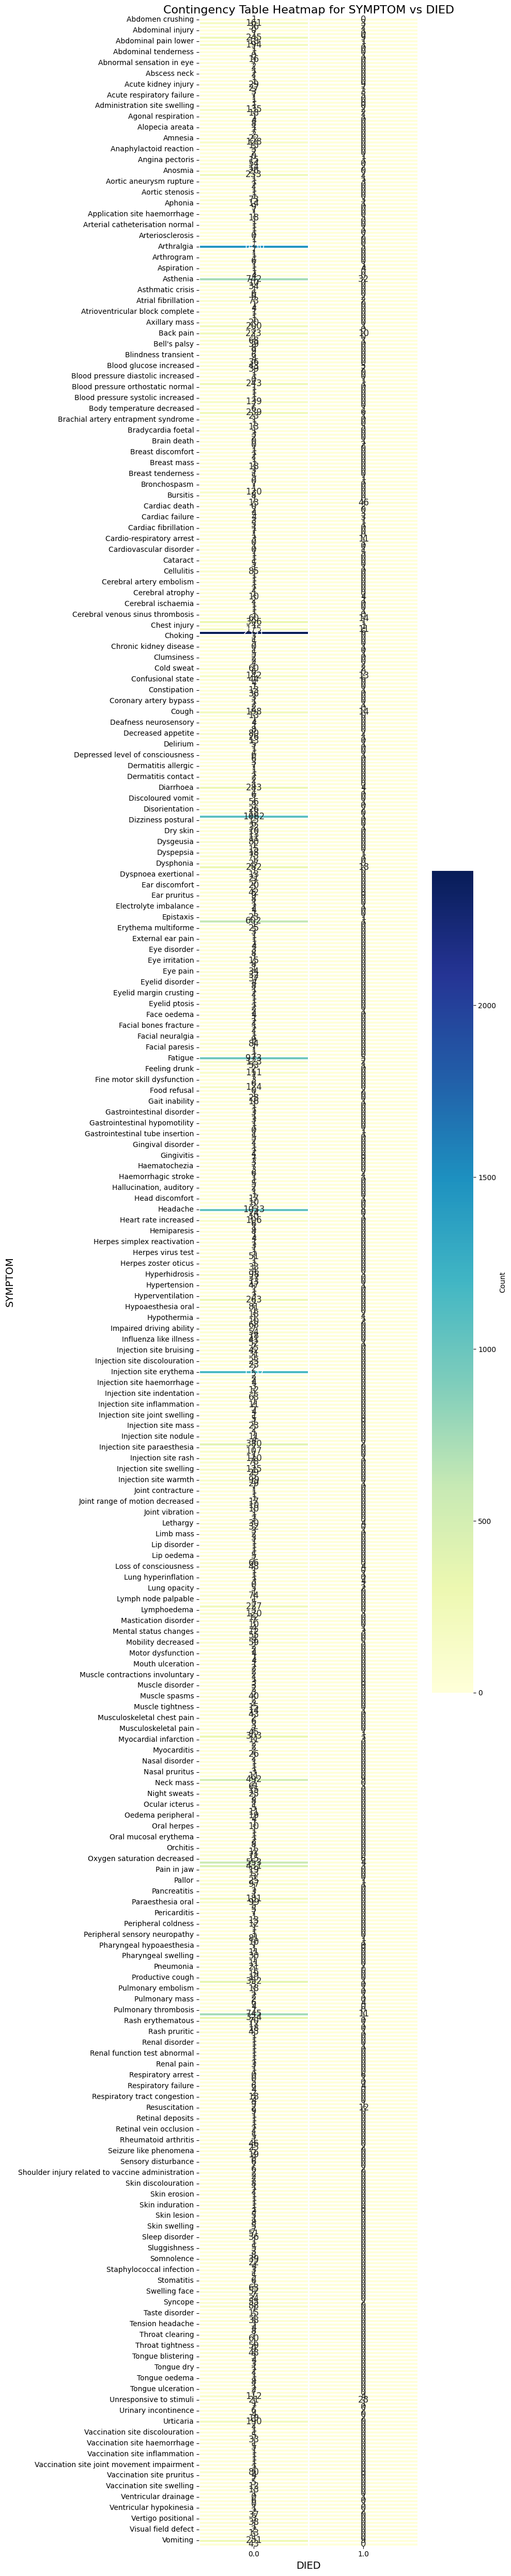

In [7]:
plt.figure(figsize=(10, 50))  # Increase the figure size
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=1, cbar_kws={'label': 'Count'}, annot_kws={"size": 12})

plt.title(f'Contingency Table Heatmap for SYMPTOM vs DIED', fontsize=16)
plt.xlabel('DIED', fontsize=14)
plt.ylabel(f'SYMPTOM', fontsize=14)

plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

Now, we perform the CHI-SQUARE TEST to check for the correlation between the 'DIED' and 'SYMPTOM' columns

In [8]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [9]:
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 7303.614875072582
P-value: 0.0
Degrees of Freedom: 700
Expected Frequencies:
[[9.78740276e-01 2.12597236e-02]
 [1.60513405e+02 3.48659467e+00]
 [3.71921305e+01 8.07869496e-01]
 ...
 [9.78740276e-01 2.12597236e-02]
 [2.54472472e+02 5.52752813e+00]
 [4.20858319e+01 9.14168114e-01]]


In [10]:
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between SYMPTOM and DIED.")
else:
    print("Fail to reject the null hypothesis: No significant association between SYMPTOM and DIED.")

Reject the null hypothesis: There is a significant association between SYMPTOM and DIED.


# CHI-SQAURE Test on all  the columns

Now, iterating over all the other features and checking for correlation.

In [11]:
test_columns = df.columns.drop(['DIED', 'VAERS_ID'])
test_columns

Index(['SYMPTOM', 'ASSIGNED_GROUP', 'SEVERITY_LEVEL', 'L_THREAT', 'HOSPITAL',
       'AGE_YRS', 'AGE_GROUP', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX',
       'ALLERGIES', 'F', 'M', 'JANSSEN', 'MODERNA', 'PFIZER',
       'VAX_DOSE_SERIES_1', 'VAX_DOSE_SERIES_2', 'VAX_SITE_LA', 'VAX_SITE_RA',
       '18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95',
       '96 +'],
      dtype='object')

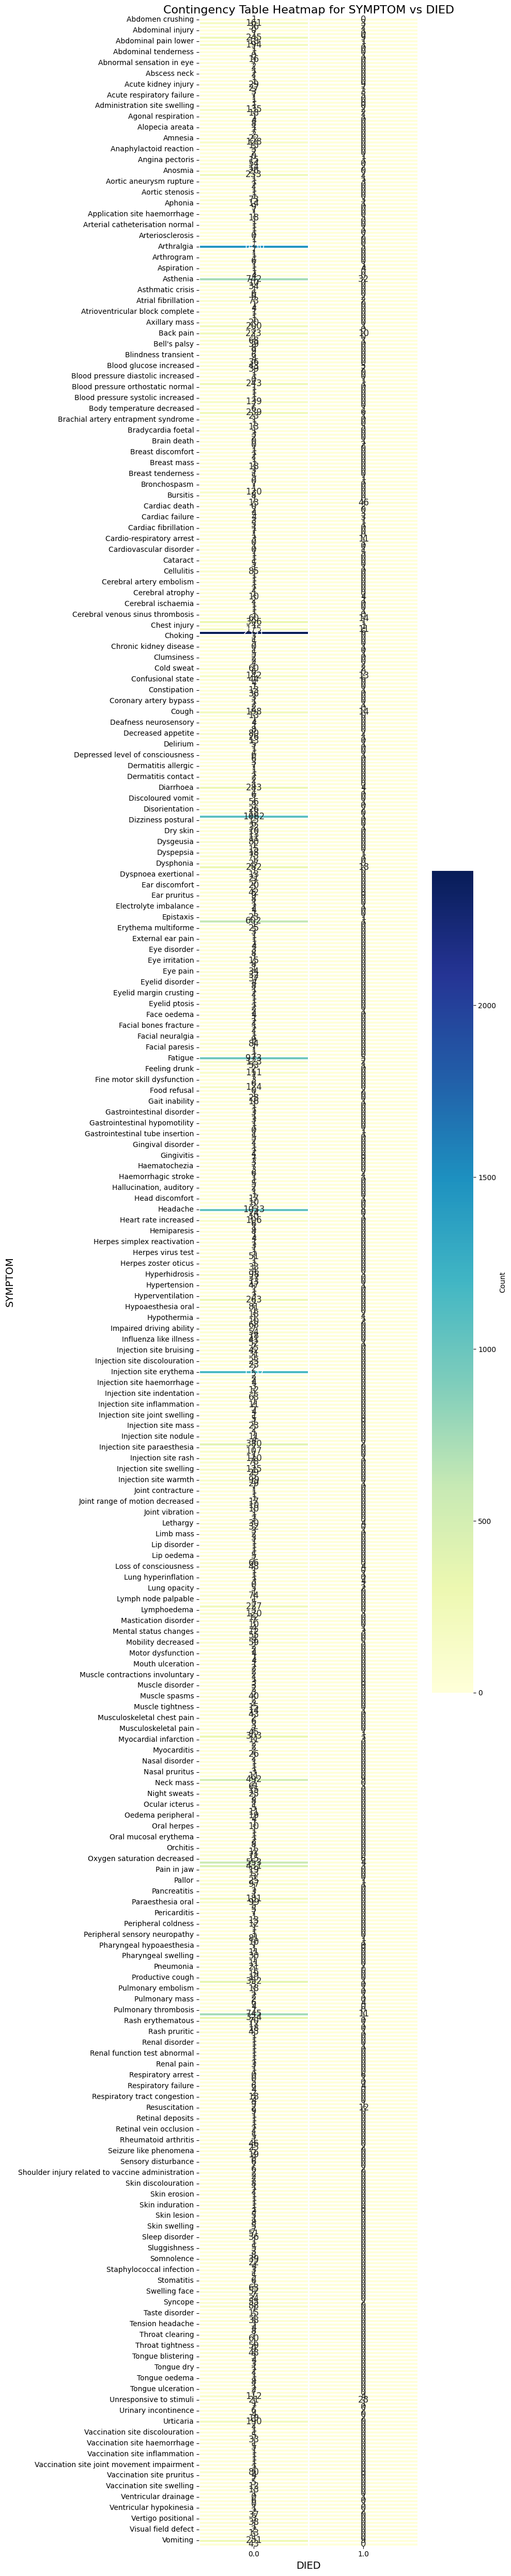

Symptom: SYMPTOM
Chi-Square Statistic: 7303.614875072582
P-value: 0.0
Degrees of Freedom: 700
--------------------------------------------------


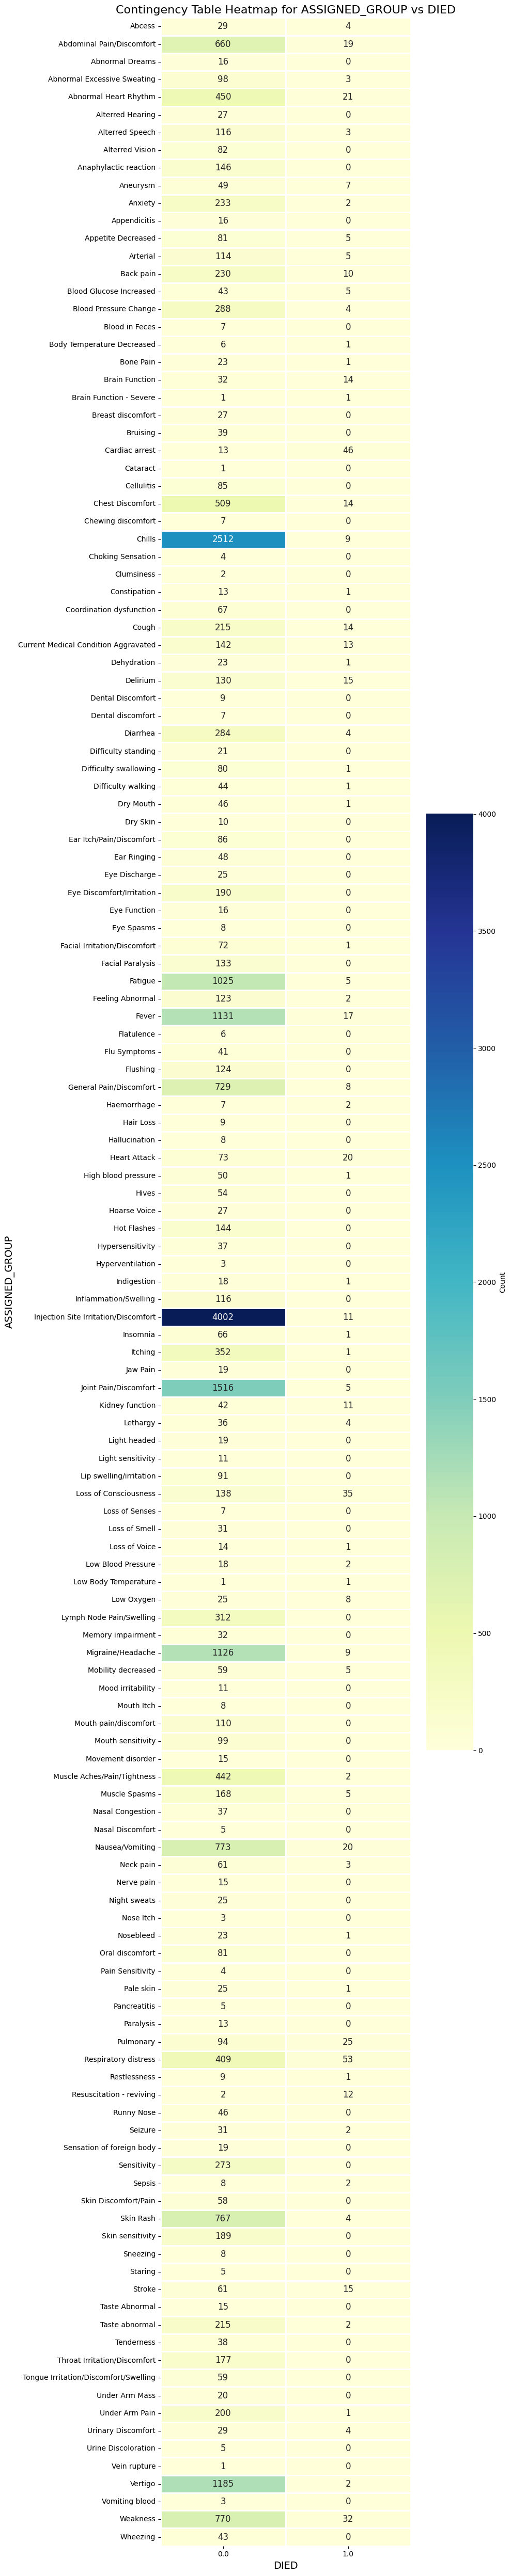

Symptom: ASSIGNED_GROUP
Chi-Square Statistic: 4016.9038871119756
P-value: 0.0
Degrees of Freedom: 142
--------------------------------------------------


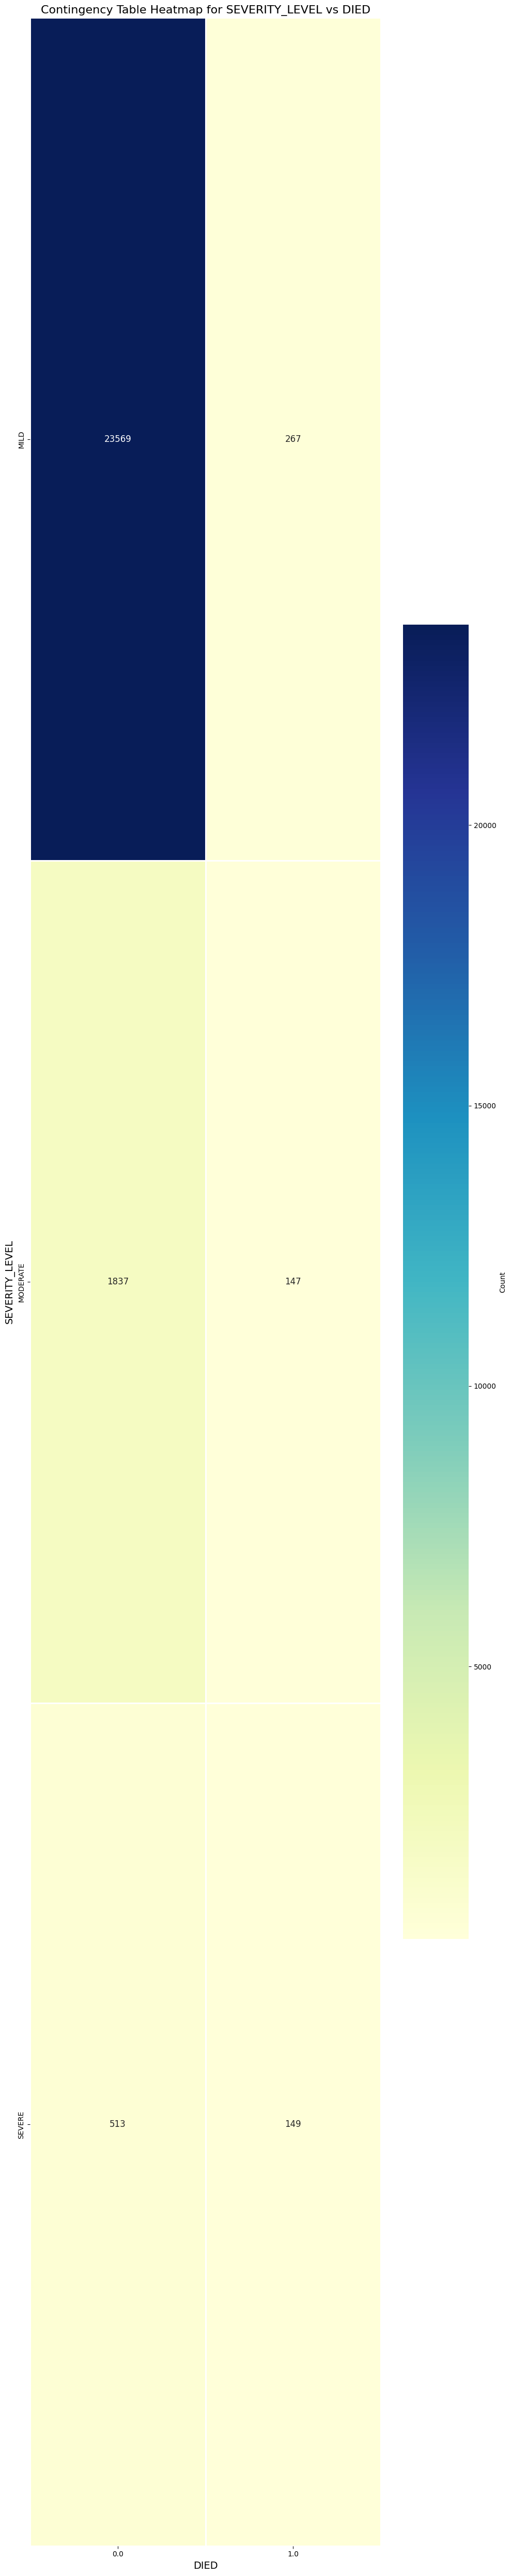

Symptom: SEVERITY_LEVEL
Chi-Square Statistic: 1703.6670726593861
P-value: 0.0
Degrees of Freedom: 2
--------------------------------------------------


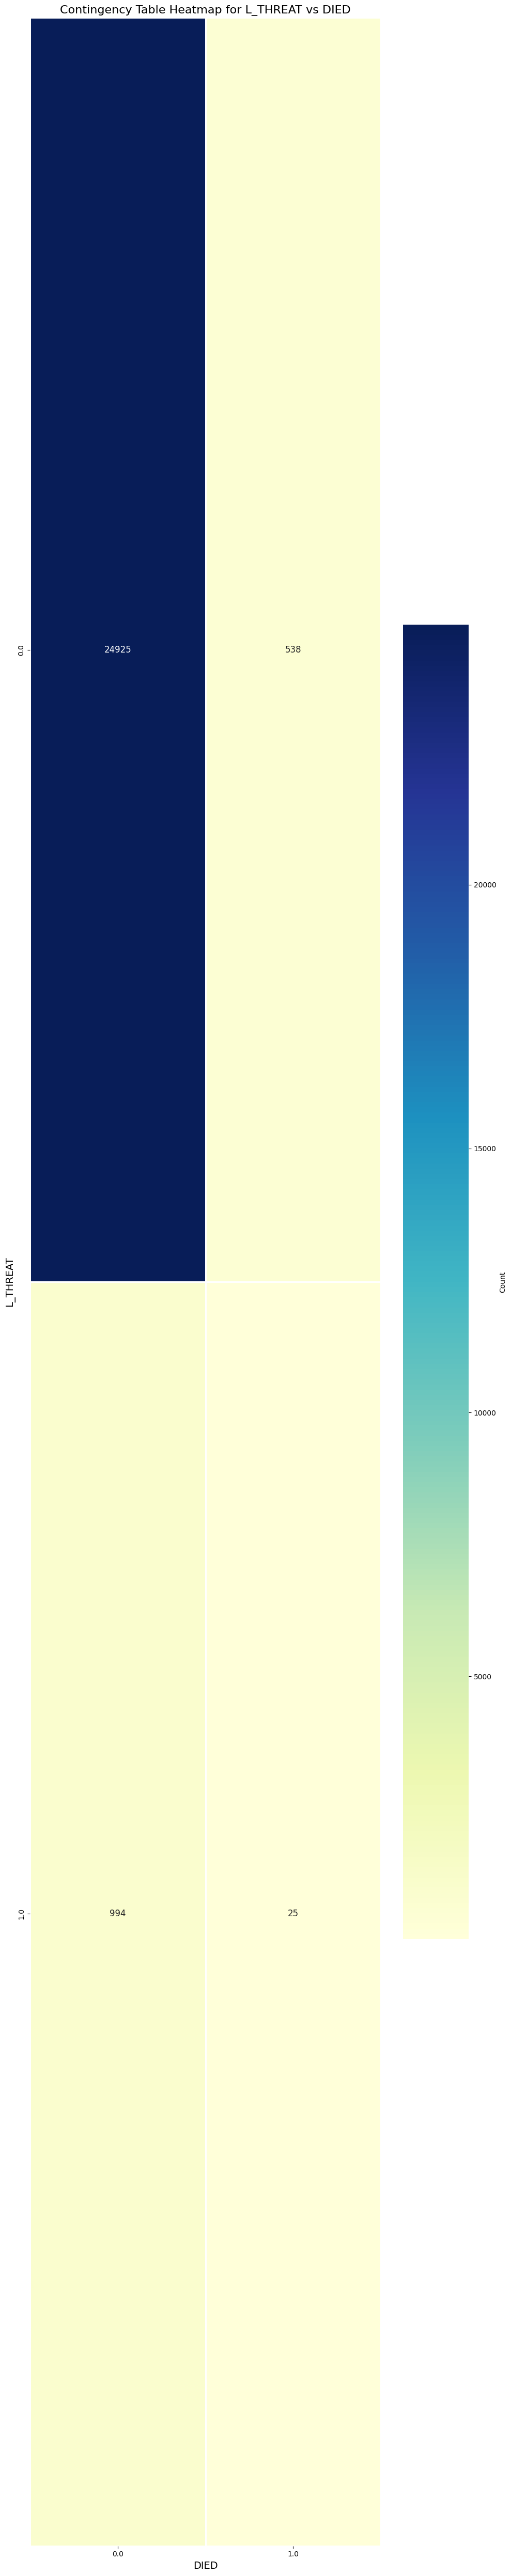

Symptom: L_THREAT
Chi-Square Statistic: 0.3946017825186443
P-value: 0.5298903734322212
Degrees of Freedom: 1
--------------------------------------------------


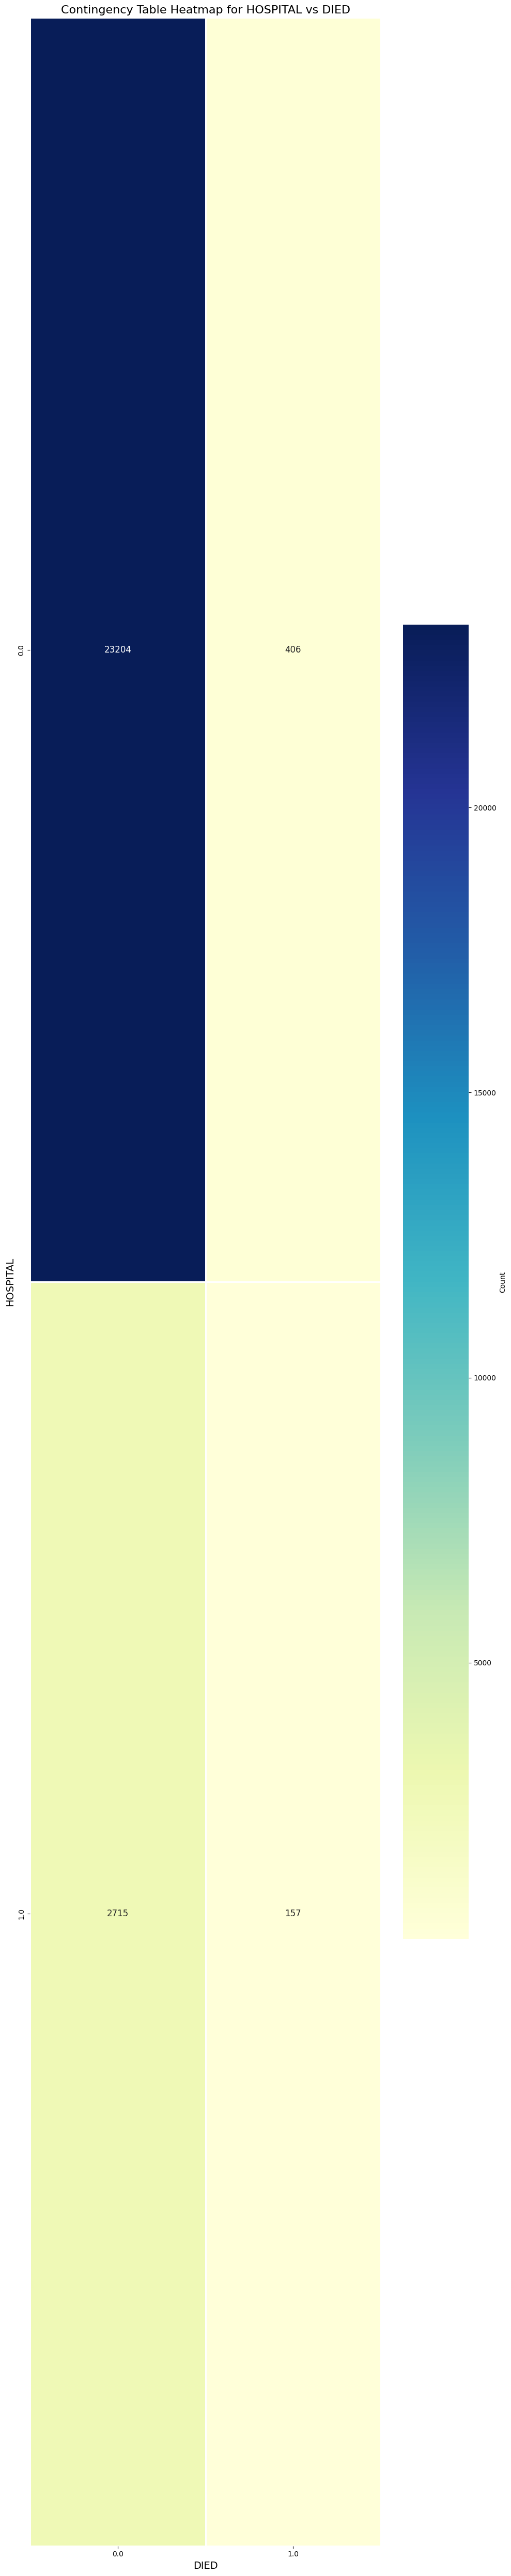

Symptom: HOSPITAL
Chi-Square Statistic: 170.97201085618417
P-value: 4.5380897253535985e-39
Degrees of Freedom: 1
--------------------------------------------------


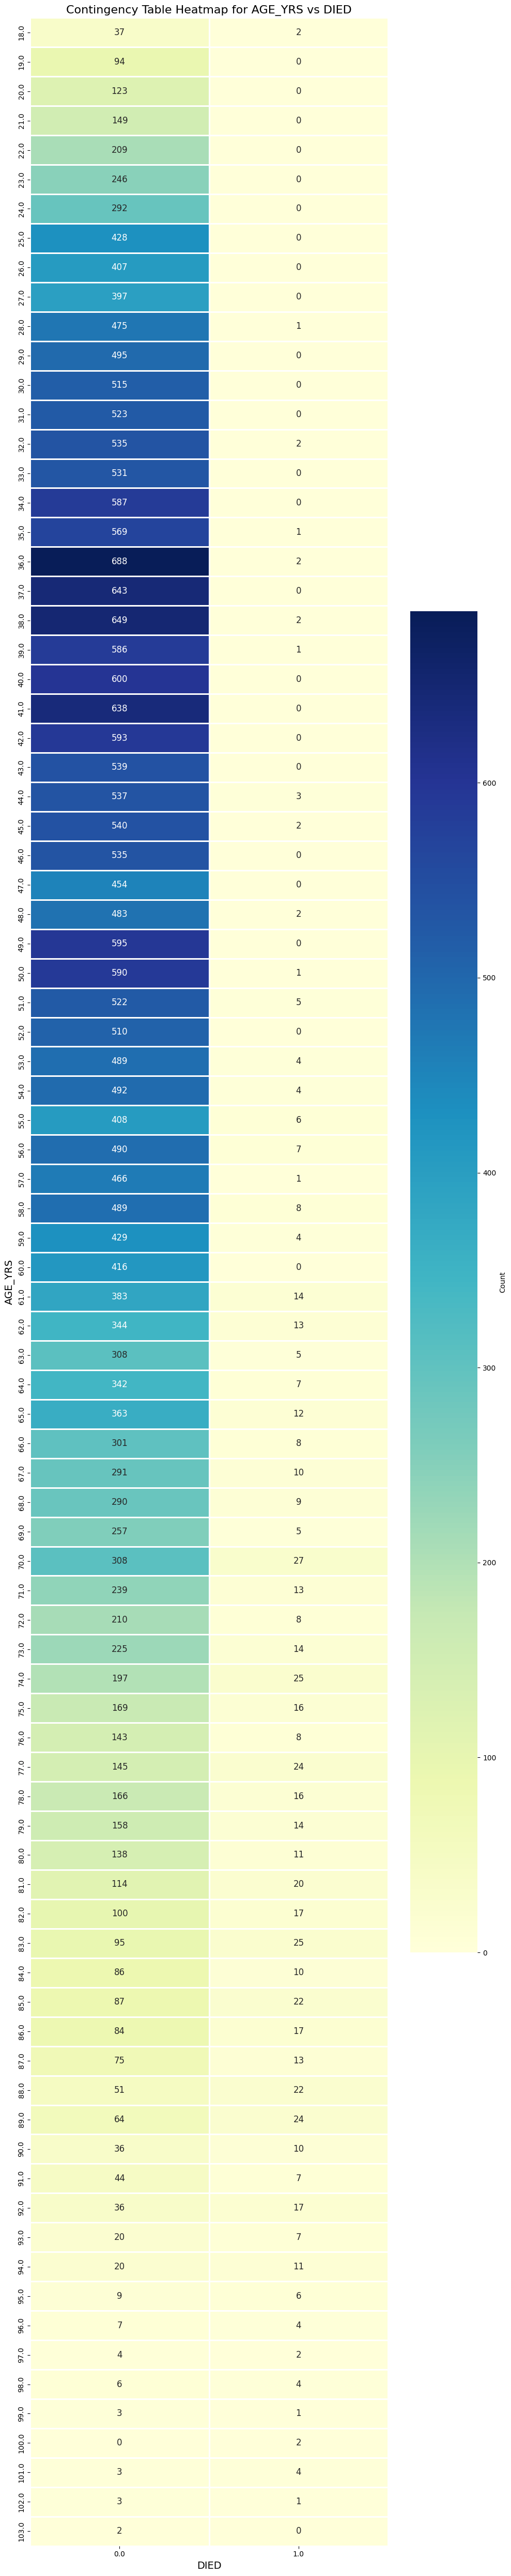

Symptom: AGE_YRS
Chi-Square Statistic: 3162.2920935435623
P-value: 0.0
Degrees of Freedom: 85
--------------------------------------------------


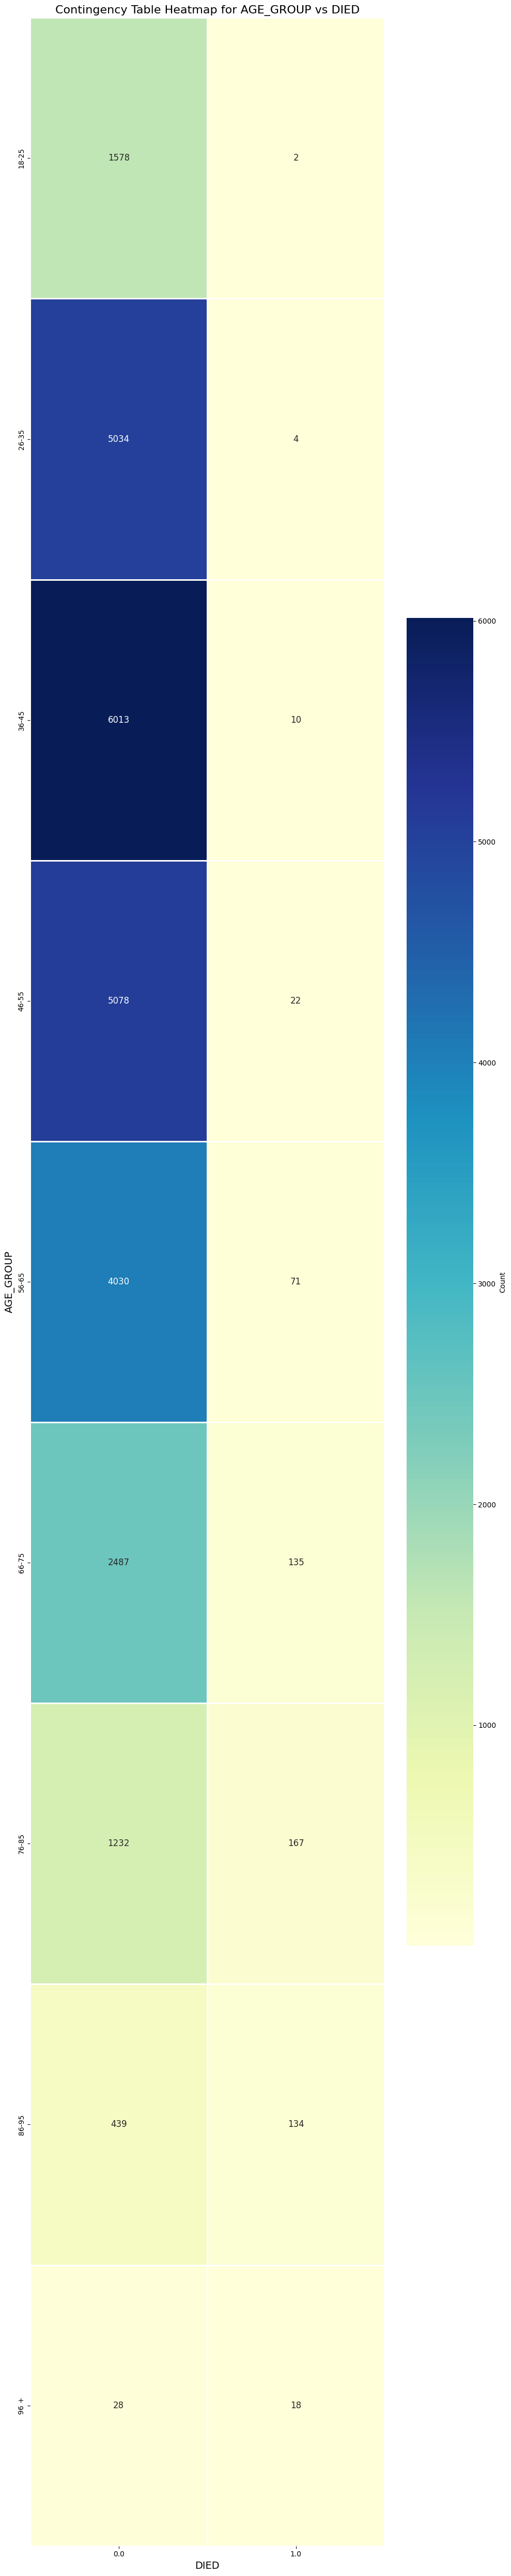

Symptom: AGE_GROUP
Chi-Square Statistic: 2626.101471183984
P-value: 0.0
Degrees of Freedom: 8
--------------------------------------------------


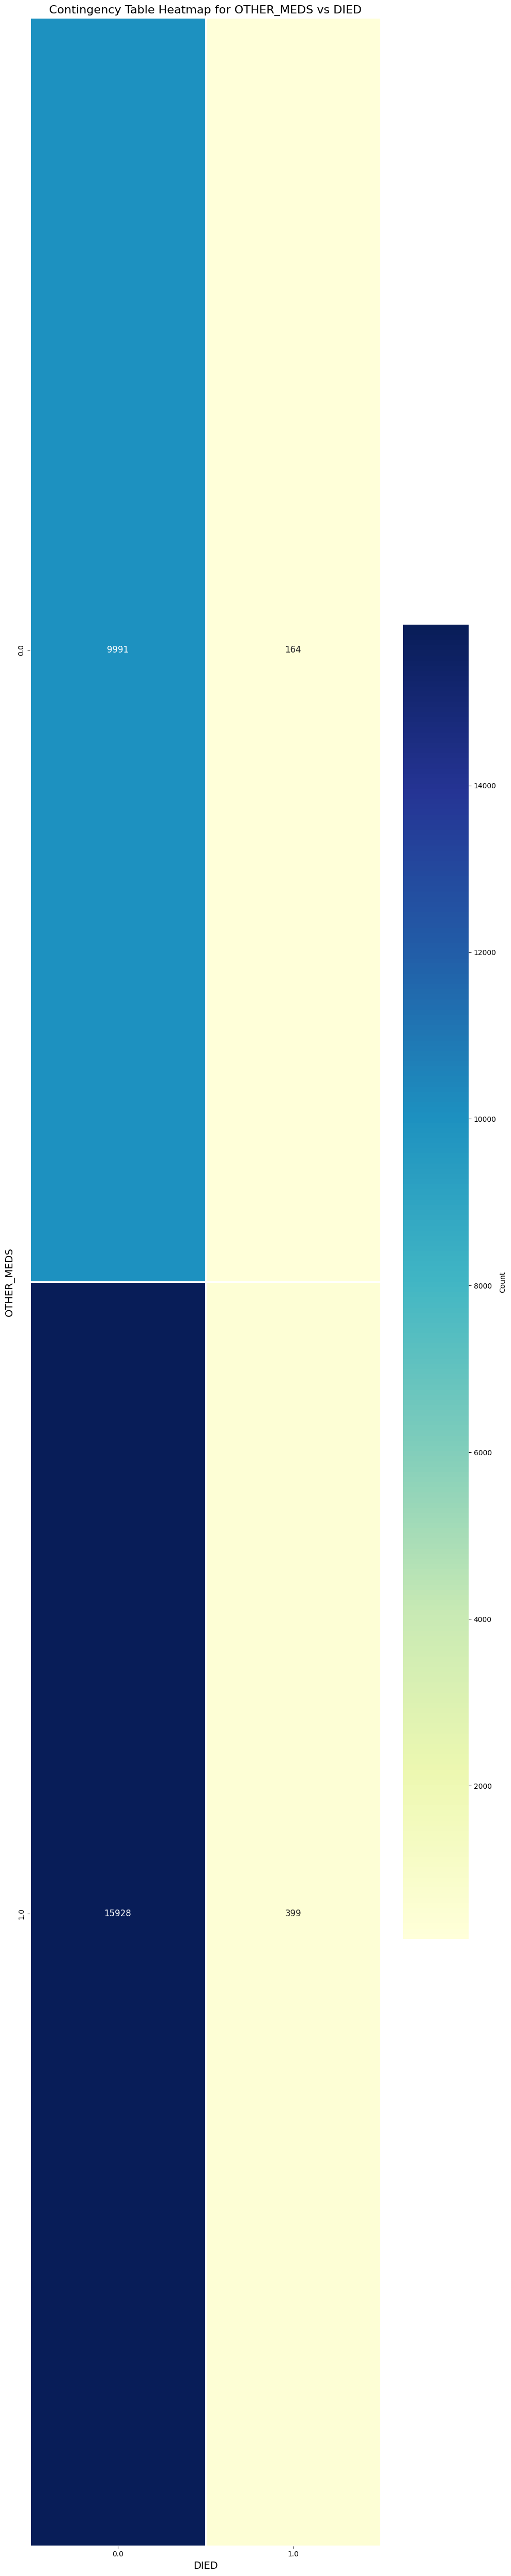

Symptom: OTHER_MEDS
Chi-Square Statistic: 20.27396804729243
P-value: 6.710746187350673e-06
Degrees of Freedom: 1
--------------------------------------------------


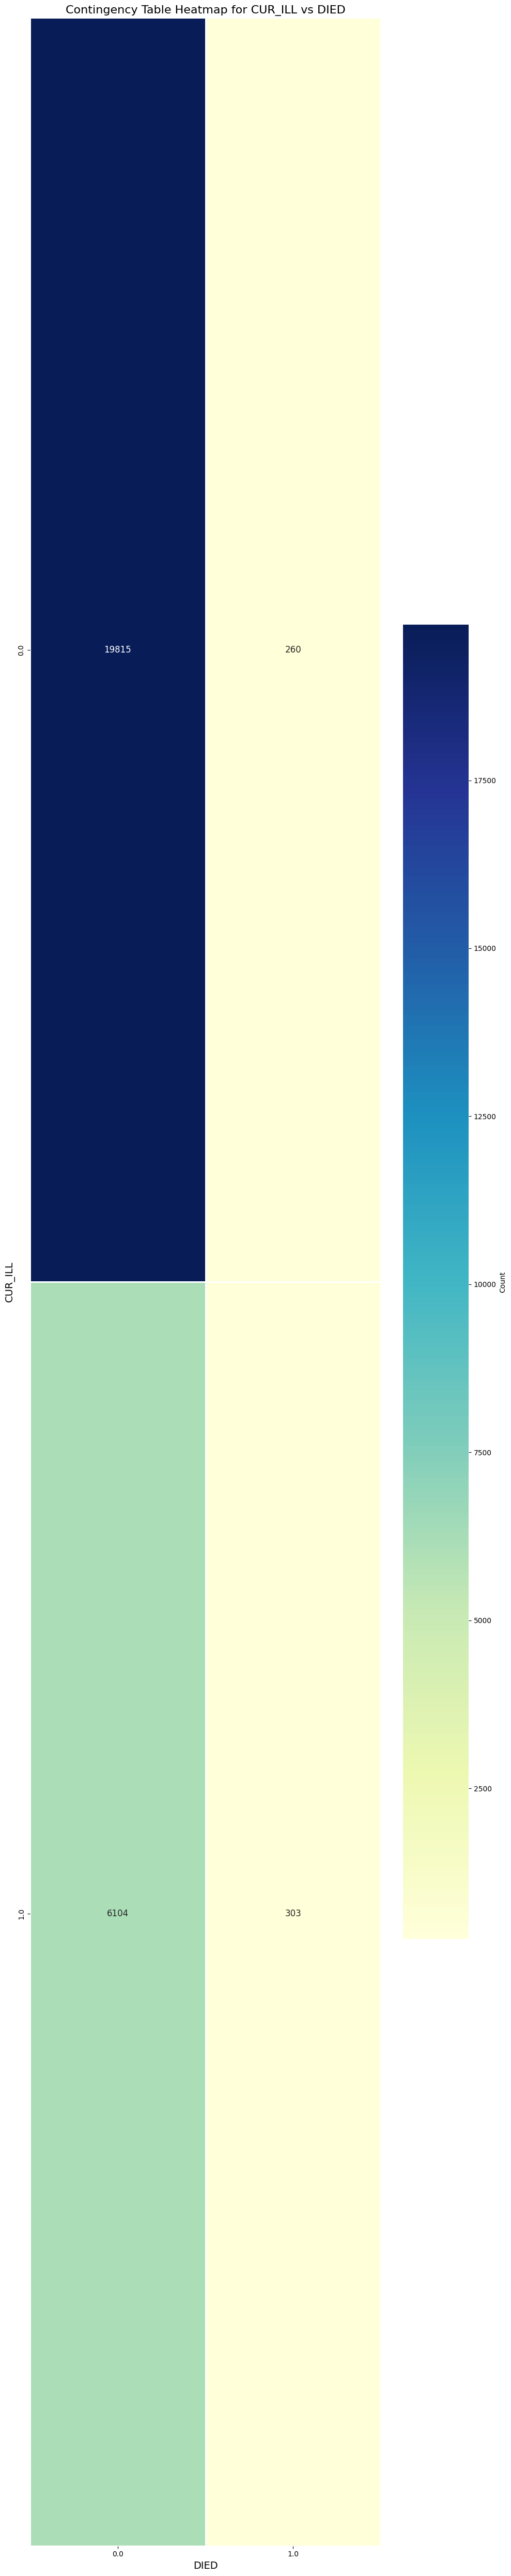

Symptom: CUR_ILL
Chi-Square Statistic: 273.61645790571
P-value: 1.8481492886070554e-61
Degrees of Freedom: 1
--------------------------------------------------


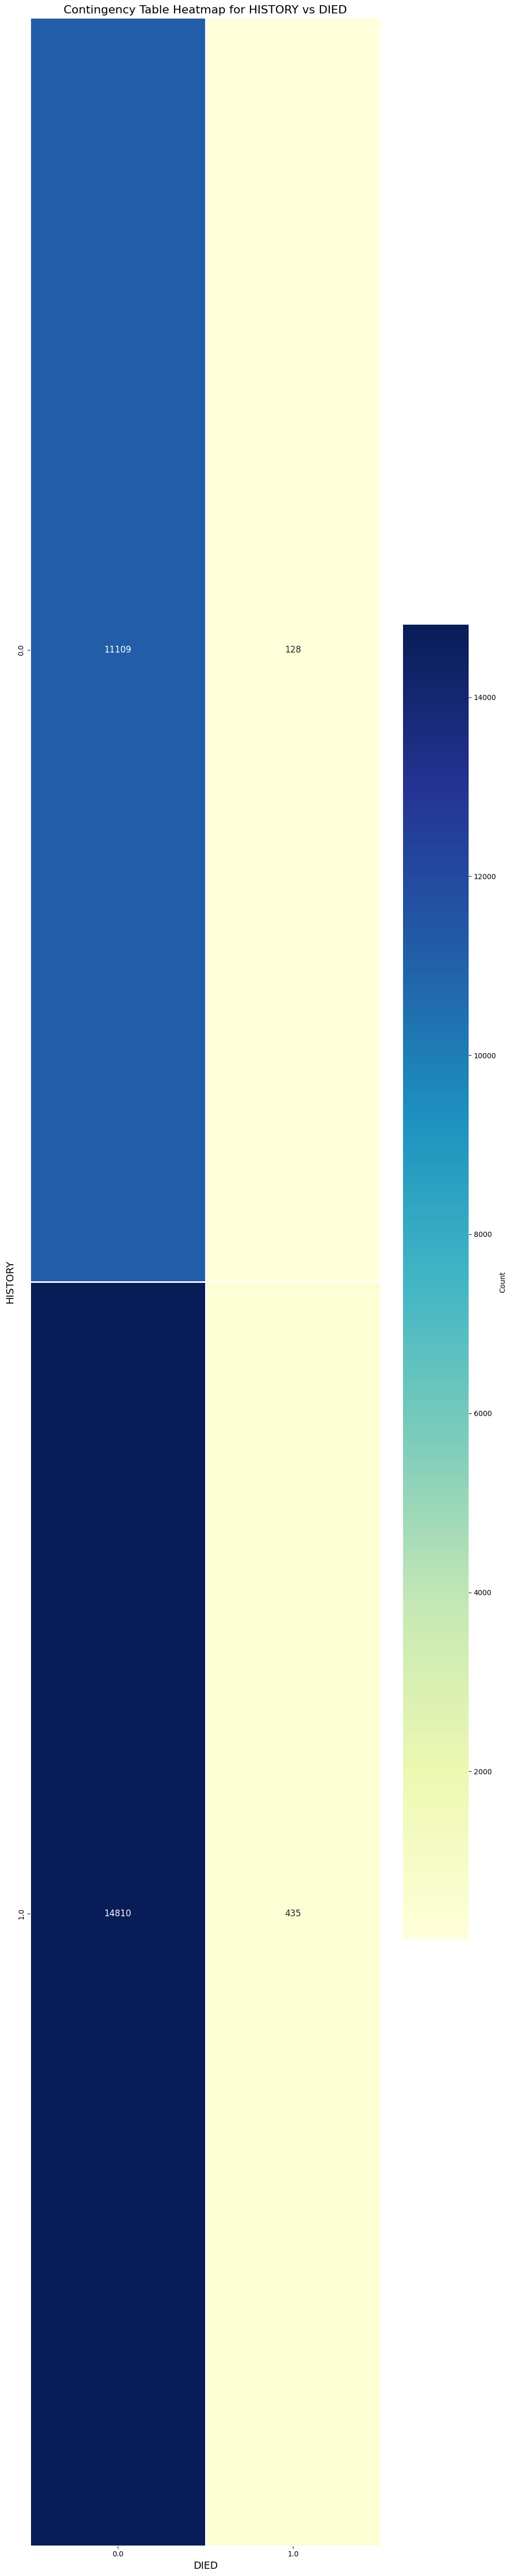

Symptom: HISTORY
Chi-Square Statistic: 90.54213871309302
P-value: 1.8107905452459356e-21
Degrees of Freedom: 1
--------------------------------------------------


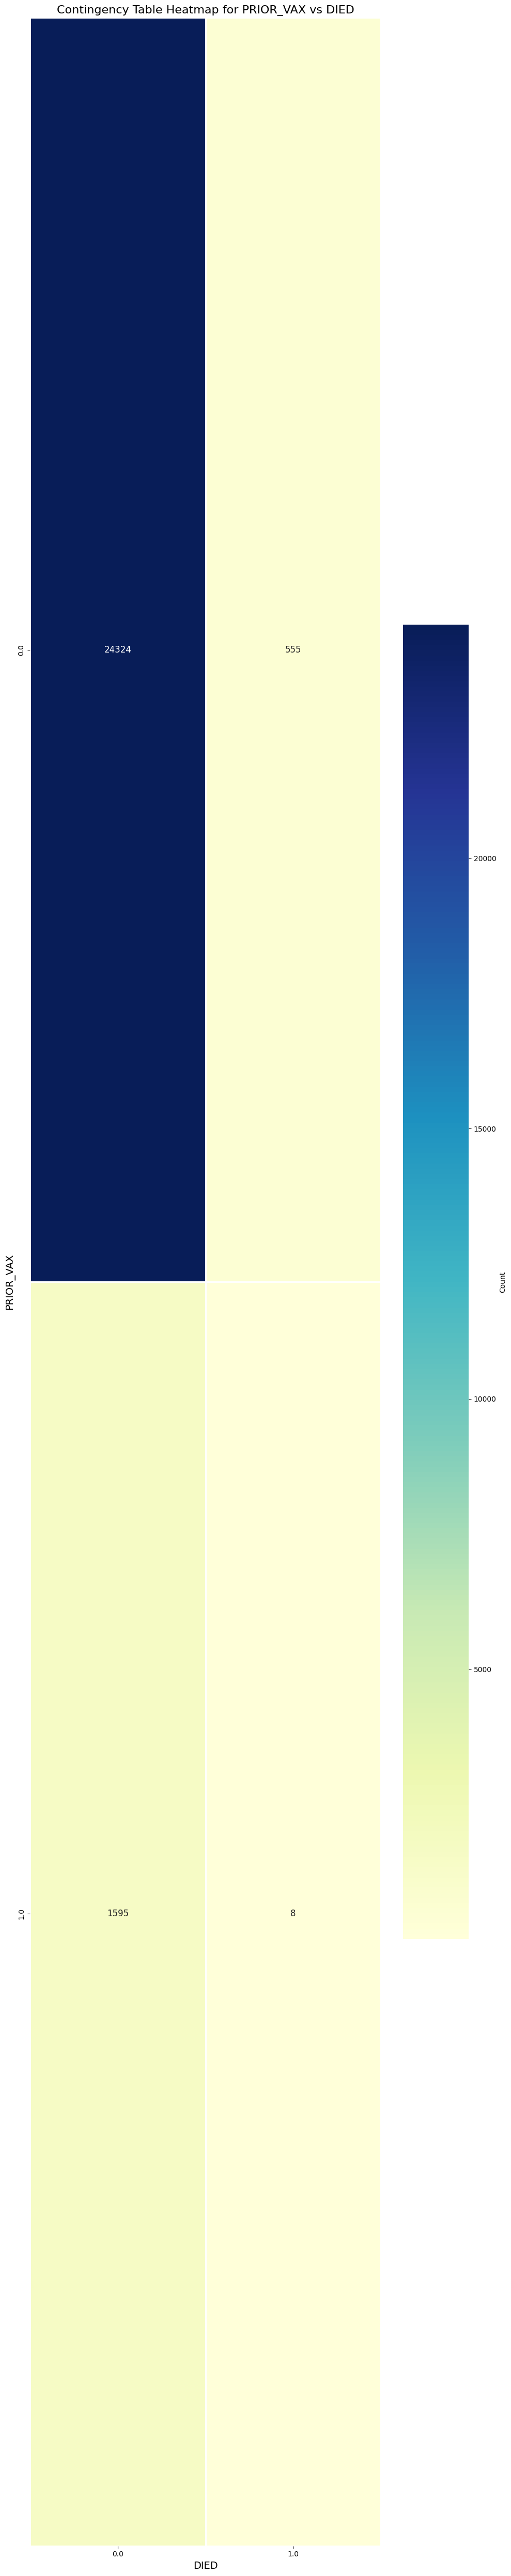

Symptom: PRIOR_VAX
Chi-Square Statistic: 20.88035263300609
P-value: 4.888834536054241e-06
Degrees of Freedom: 1
--------------------------------------------------


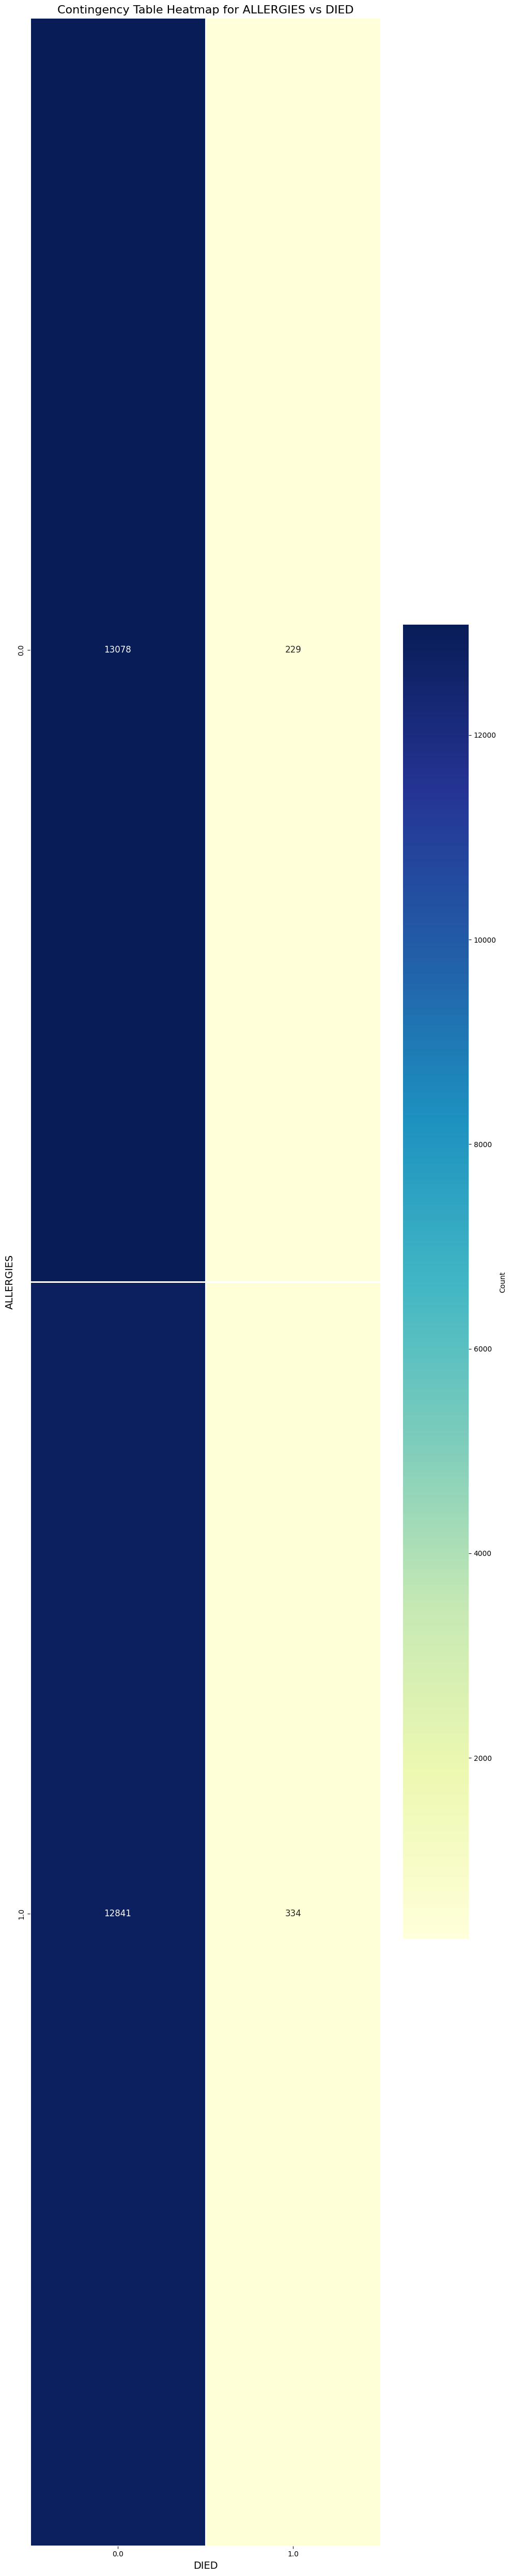

Symptom: ALLERGIES
Chi-Square Statistic: 20.70277402973499
P-value: 5.363823889550106e-06
Degrees of Freedom: 1
--------------------------------------------------


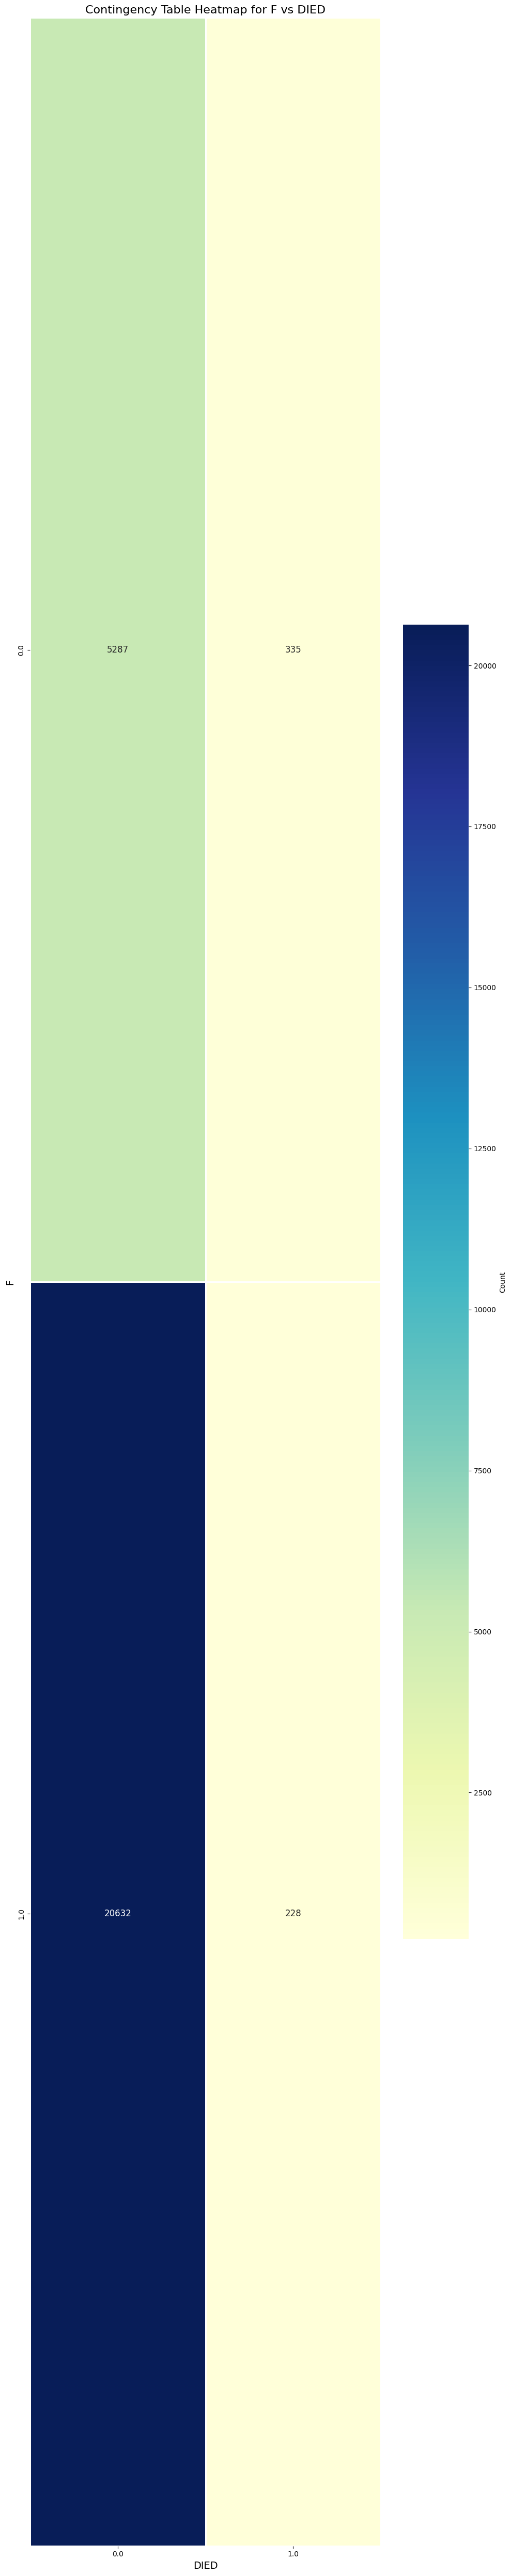

Symptom: F
Chi-Square Statistic: 501.5427160494967
P-value: 4.388412519605896e-111
Degrees of Freedom: 1
--------------------------------------------------


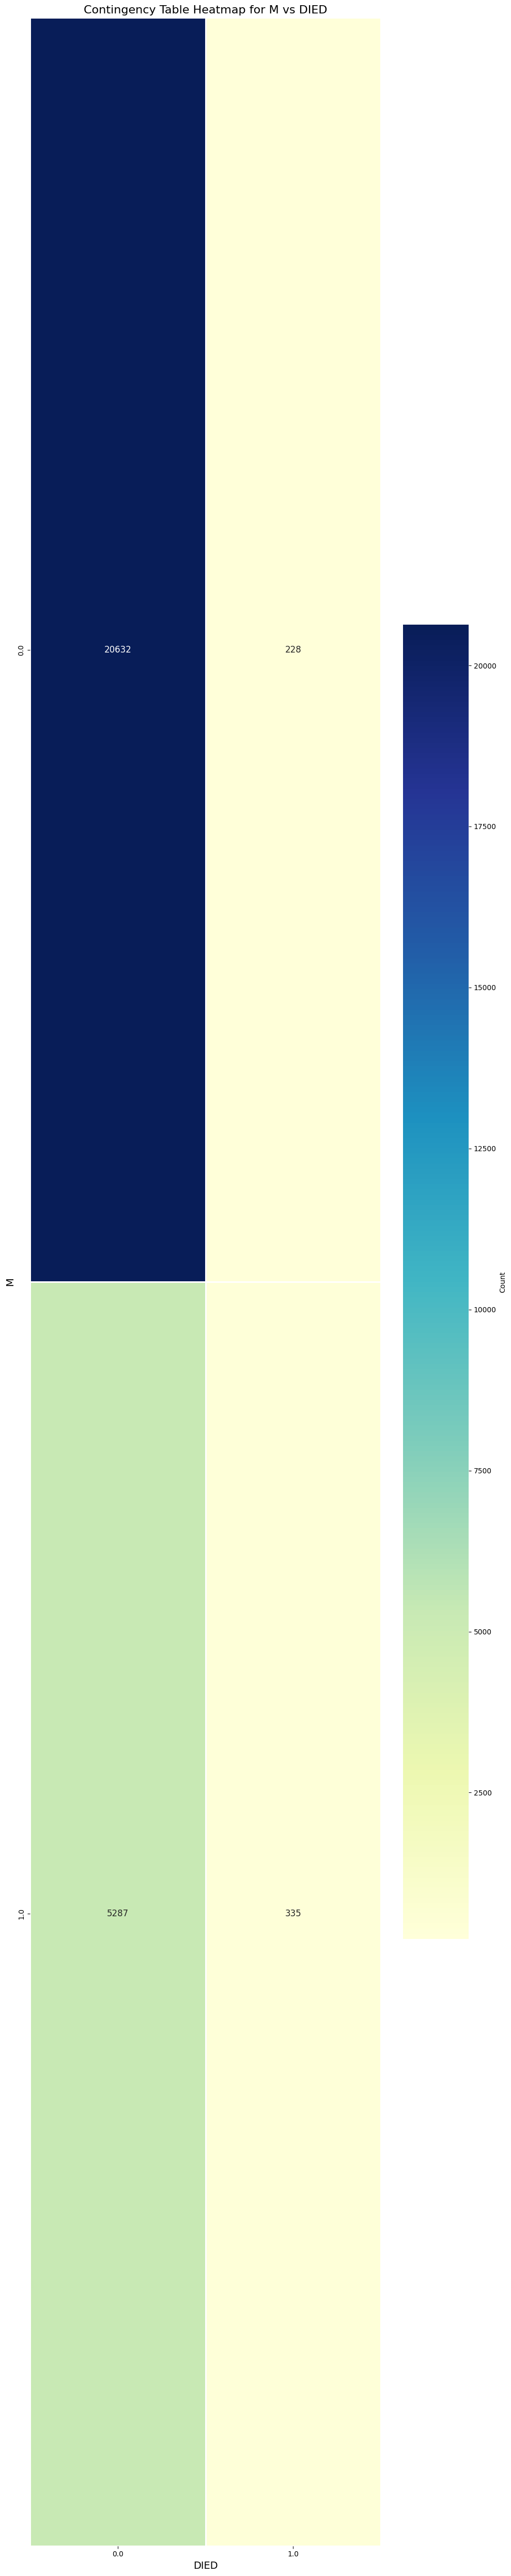

Symptom: M
Chi-Square Statistic: 501.5427160494967
P-value: 4.388412519605896e-111
Degrees of Freedom: 1
--------------------------------------------------


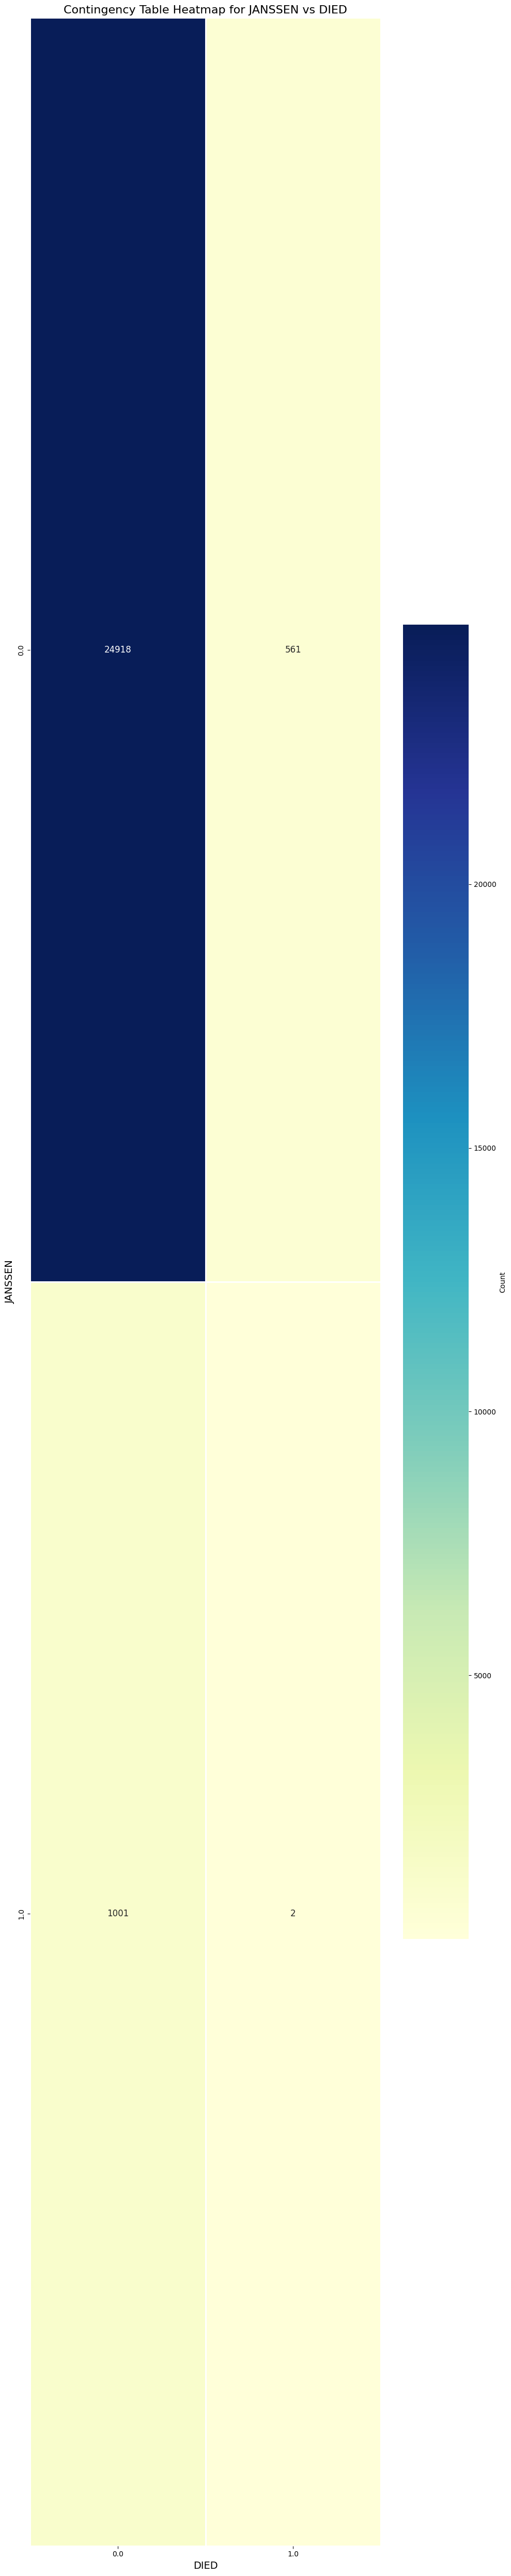

Symptom: JANSSEN
Chi-Square Statistic: 17.64587828246066
P-value: 2.660912981438105e-05
Degrees of Freedom: 1
--------------------------------------------------


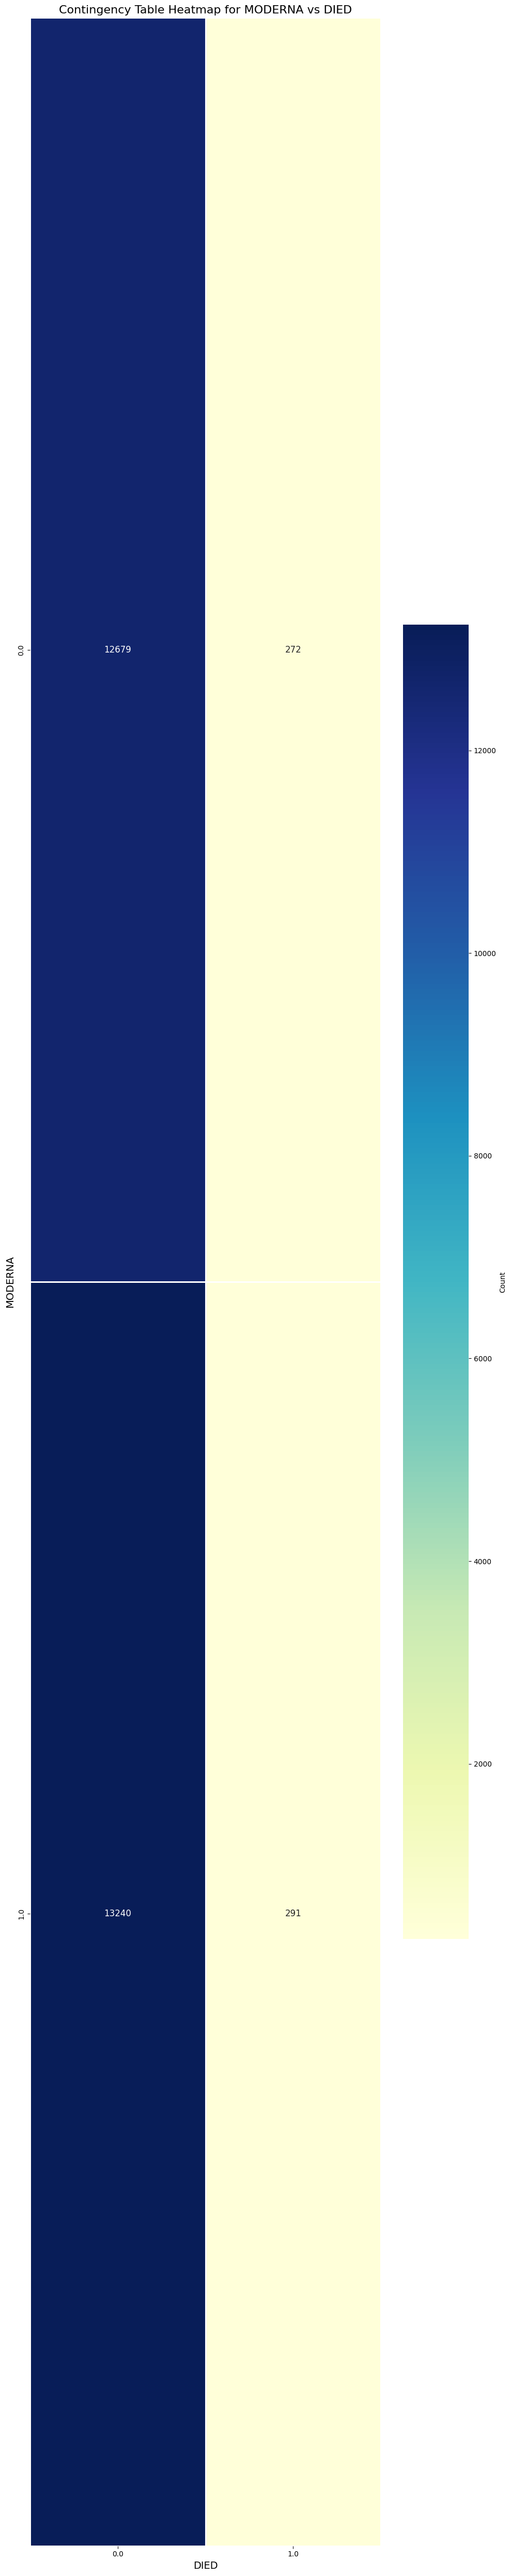

Symptom: MODERNA
Chi-Square Statistic: 0.058358032014204406
P-value: 0.8091102150521505
Degrees of Freedom: 1
--------------------------------------------------


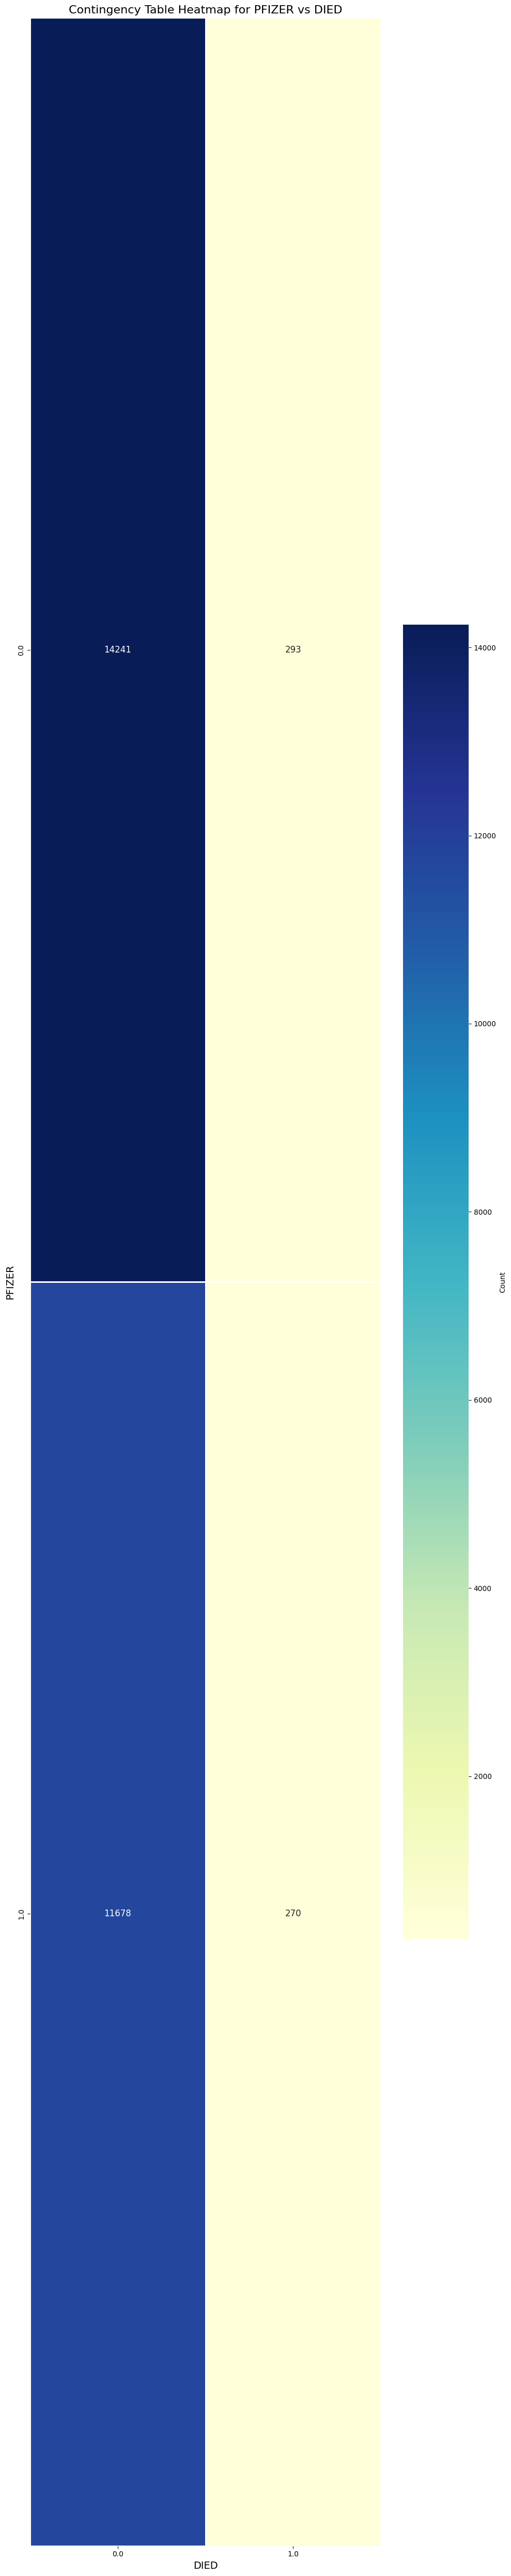

Symptom: PFIZER
Chi-Square Statistic: 1.7582561632617497
P-value: 0.1848421750051868
Degrees of Freedom: 1
--------------------------------------------------


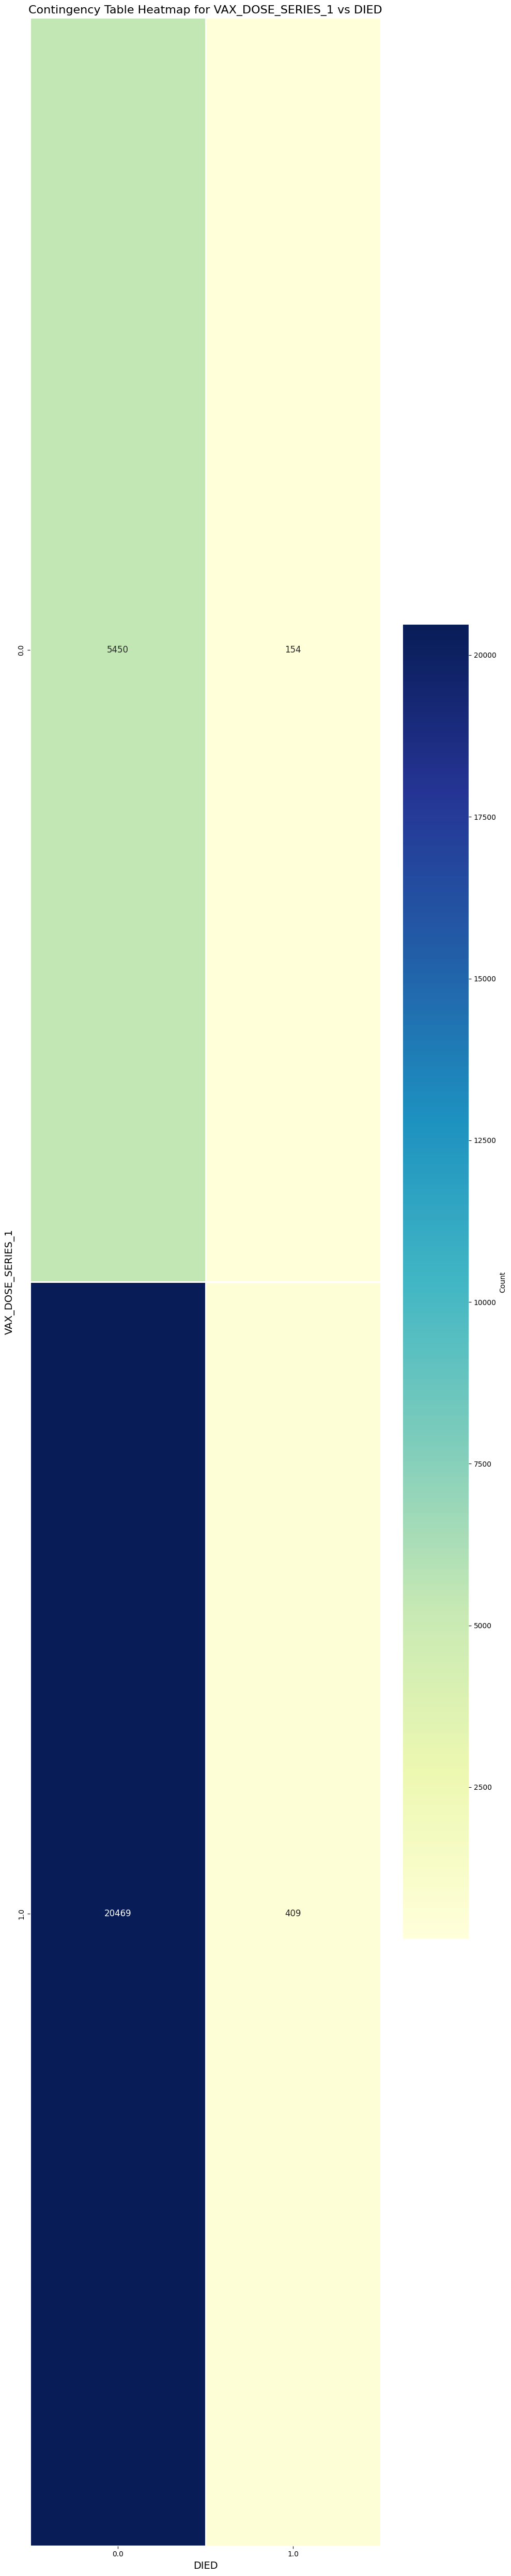

Symptom: VAX_DOSE_SERIES_1
Chi-Square Statistic: 12.842745168765966
P-value: 0.00033879021462315513
Degrees of Freedom: 1
--------------------------------------------------


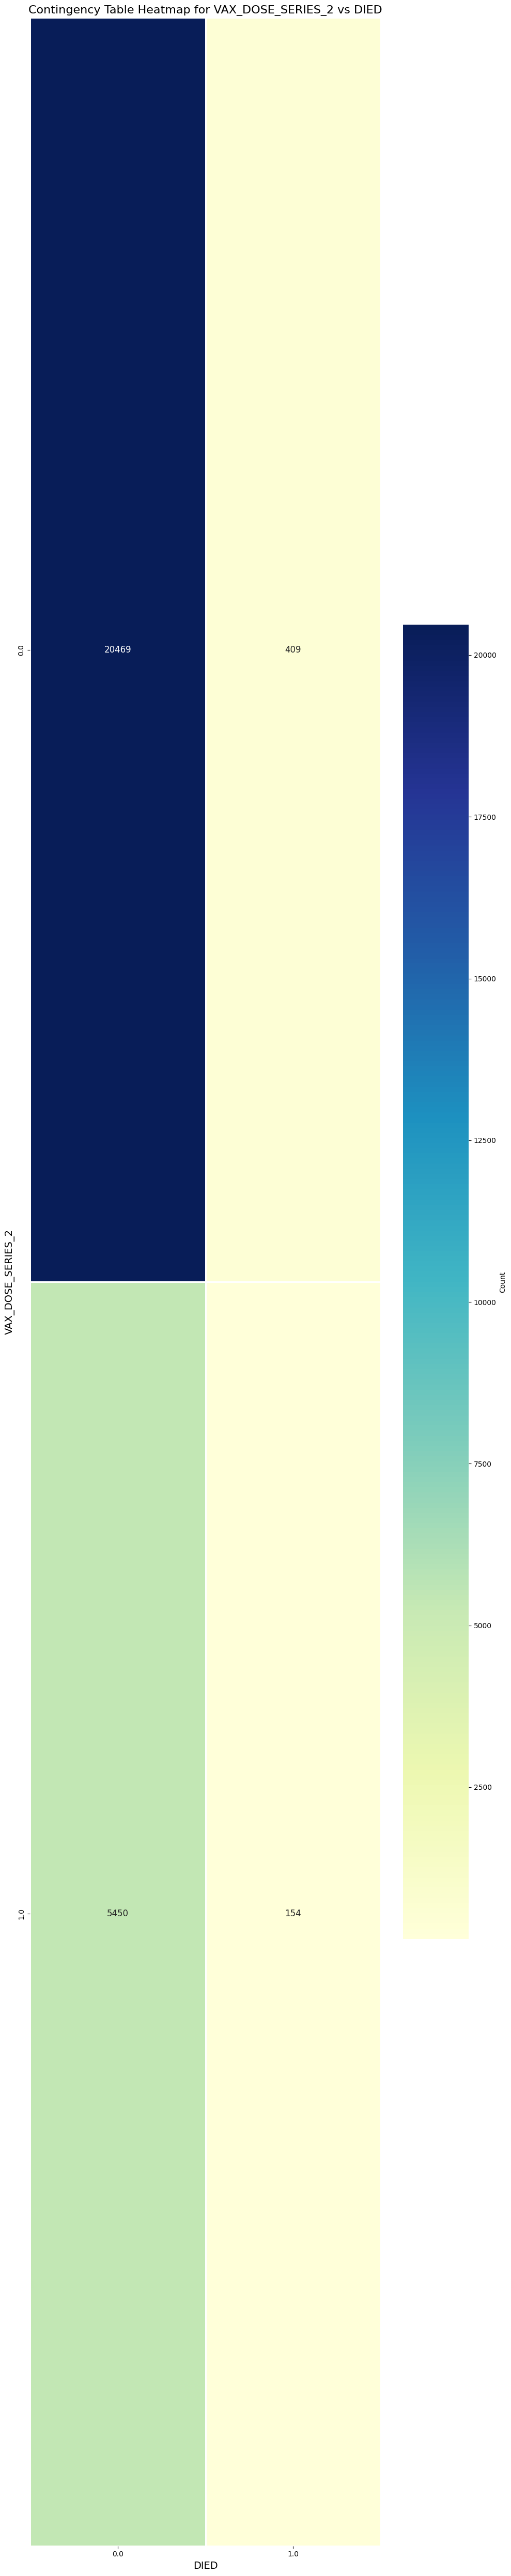

Symptom: VAX_DOSE_SERIES_2
Chi-Square Statistic: 12.842745168765967
P-value: 0.00033879021462315454
Degrees of Freedom: 1
--------------------------------------------------


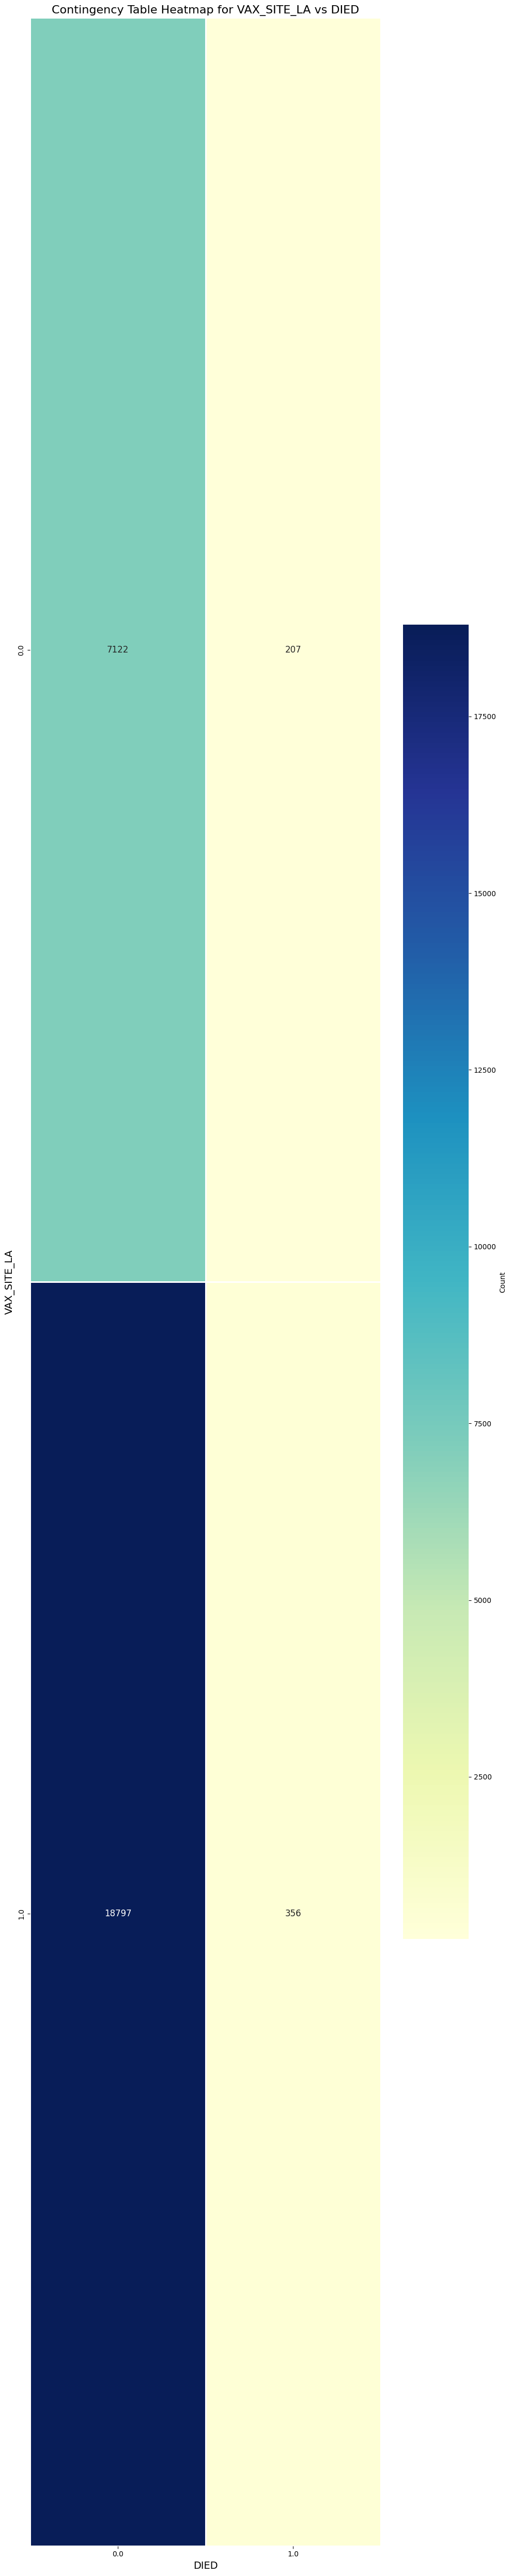

Symptom: VAX_SITE_LA
Chi-Square Statistic: 23.294086145721813
P-value: 1.3902682230431223e-06
Degrees of Freedom: 1
--------------------------------------------------


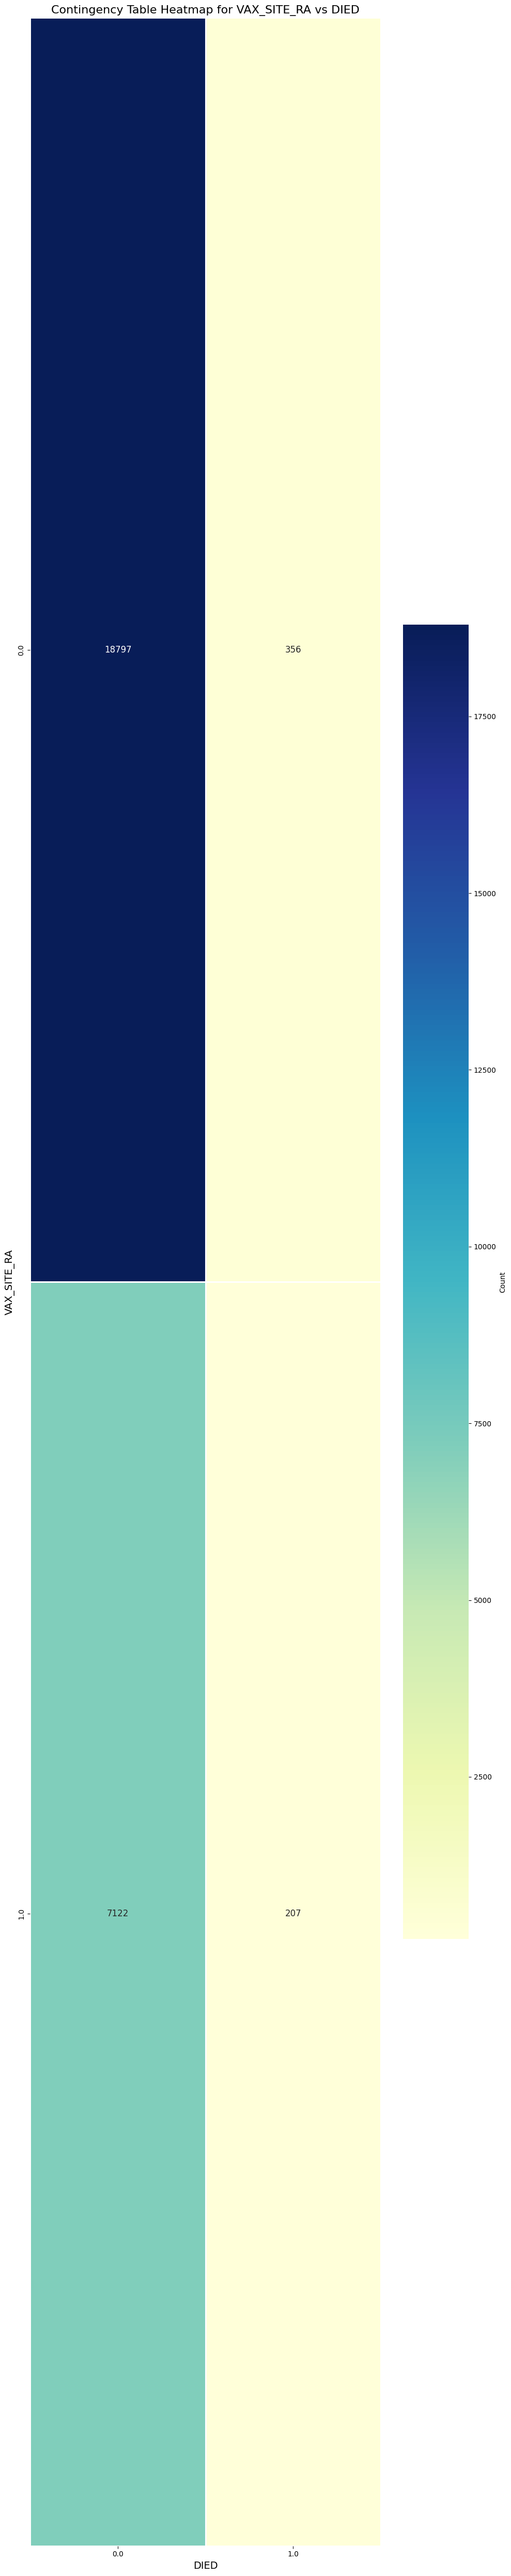

Symptom: VAX_SITE_RA
Chi-Square Statistic: 23.294086145721813
P-value: 1.3902682230431223e-06
Degrees of Freedom: 1
--------------------------------------------------


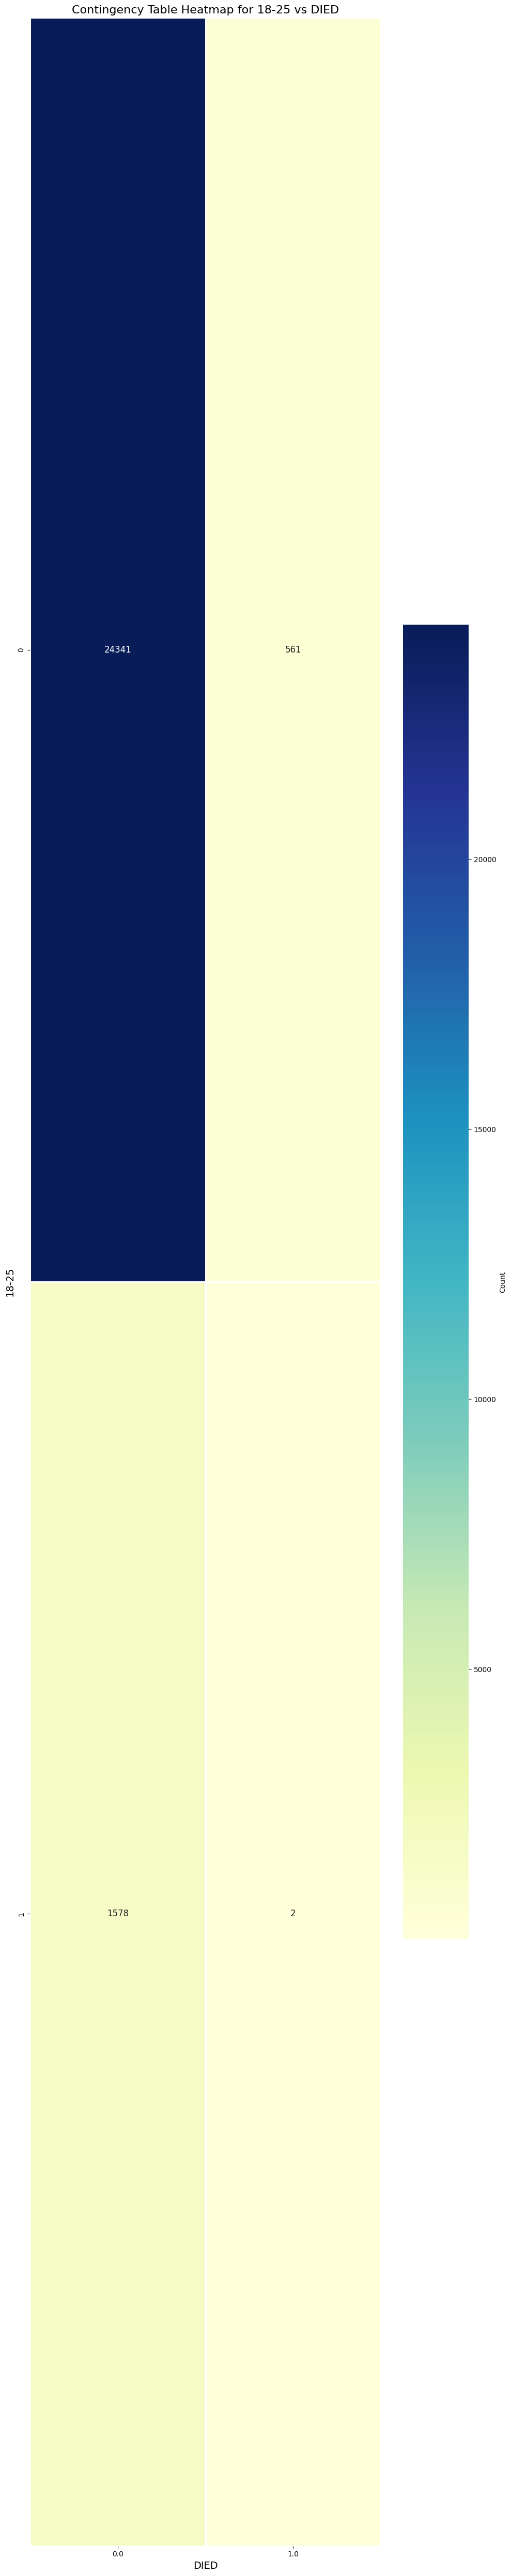

Symptom: 18-25
Chi-Square Statistic: 31.266983488981246
P-value: 2.2487161248401494e-08
Degrees of Freedom: 1
--------------------------------------------------


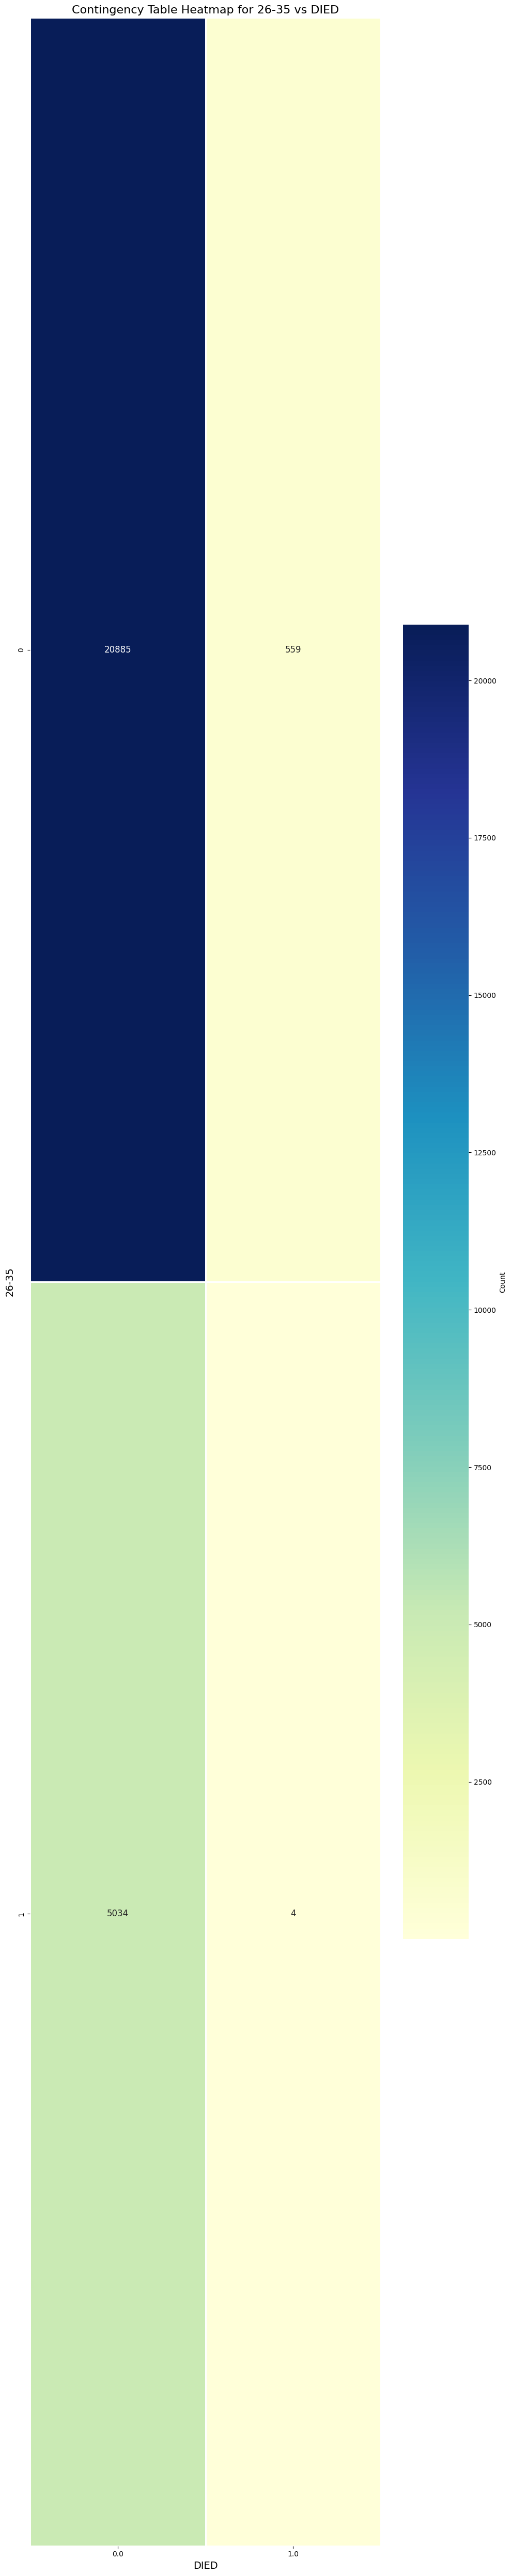

Symptom: 26-35
Chi-Square Statistic: 124.02561417917748
P-value: 8.316310903909149e-29
Degrees of Freedom: 1
--------------------------------------------------


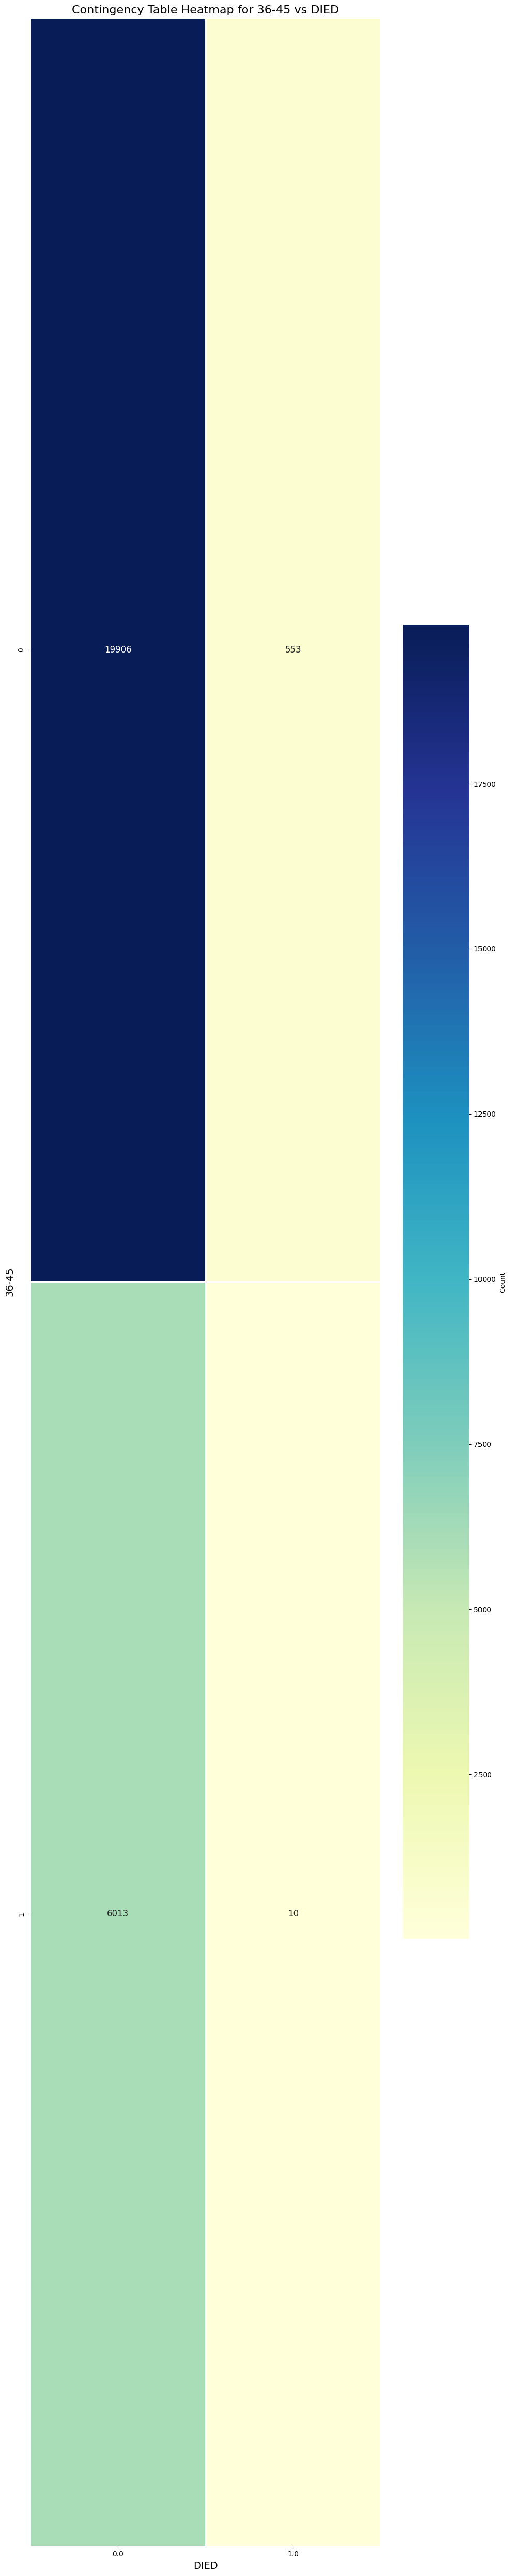

Symptom: 36-45
Chi-Square Statistic: 142.70982374097102
P-value: 6.802632347092484e-33
Degrees of Freedom: 1
--------------------------------------------------


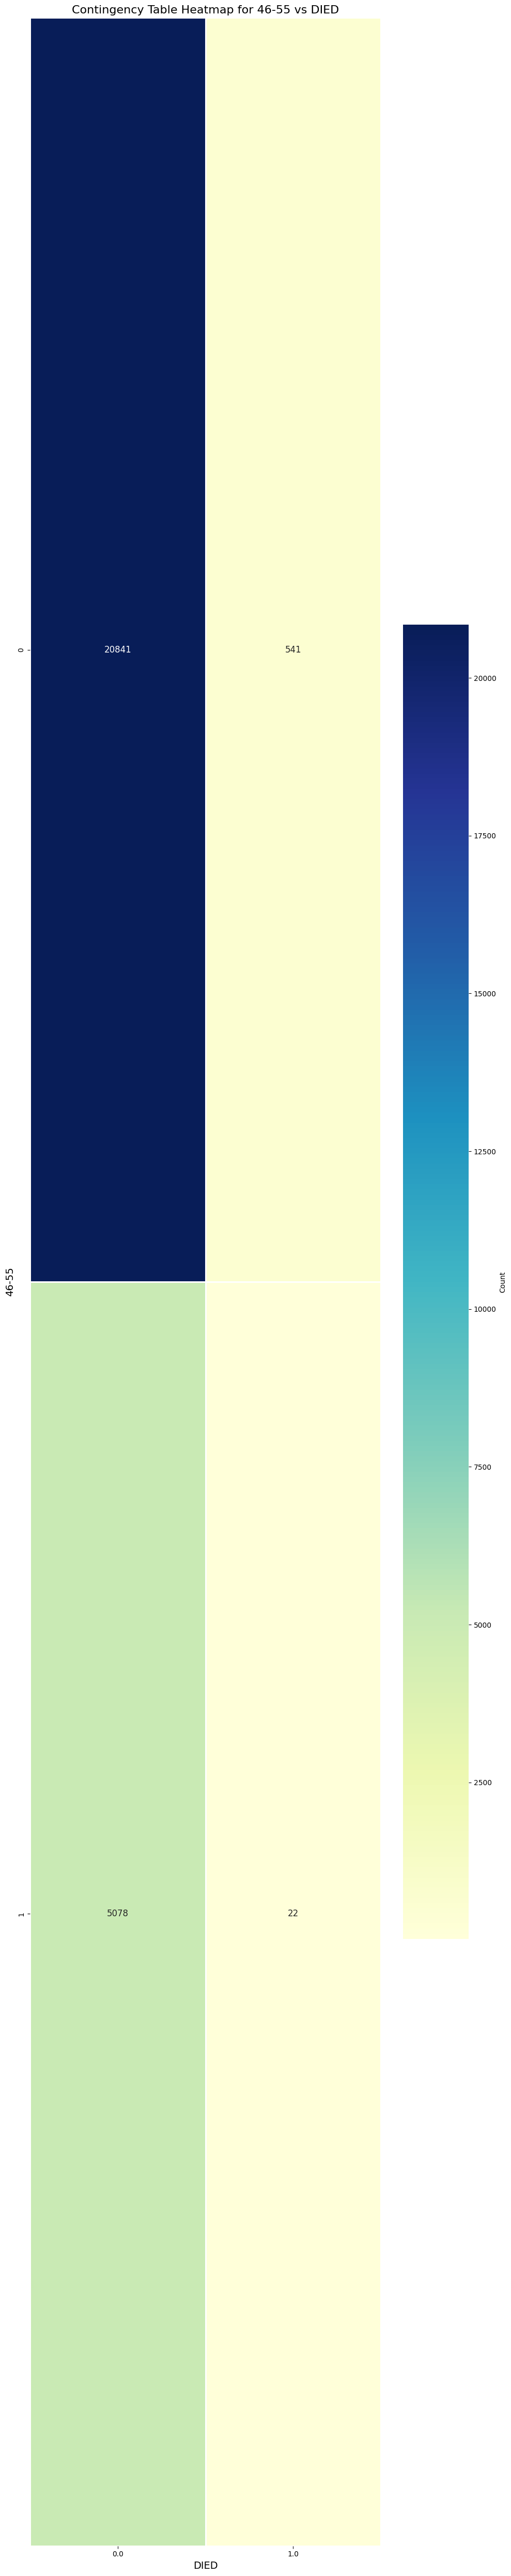

Symptom: 46-55
Chi-Square Statistic: 86.16723273686014
P-value: 1.6534478147732817e-20
Degrees of Freedom: 1
--------------------------------------------------


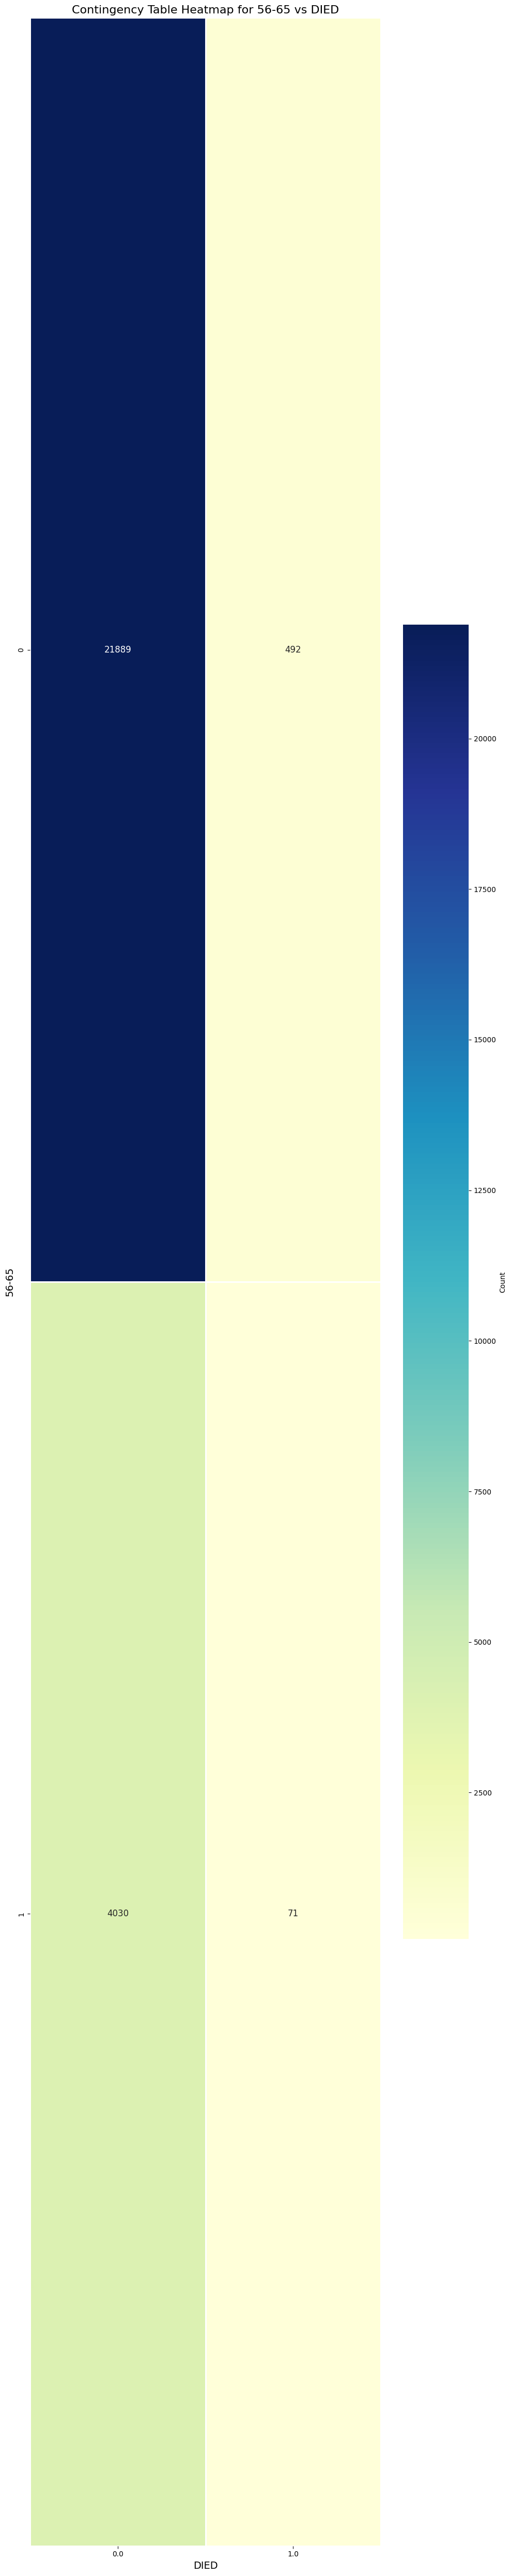

Symptom: 56-65
Chi-Square Statistic: 3.4118338413233915
P-value: 0.06473047425643759
Degrees of Freedom: 1
--------------------------------------------------


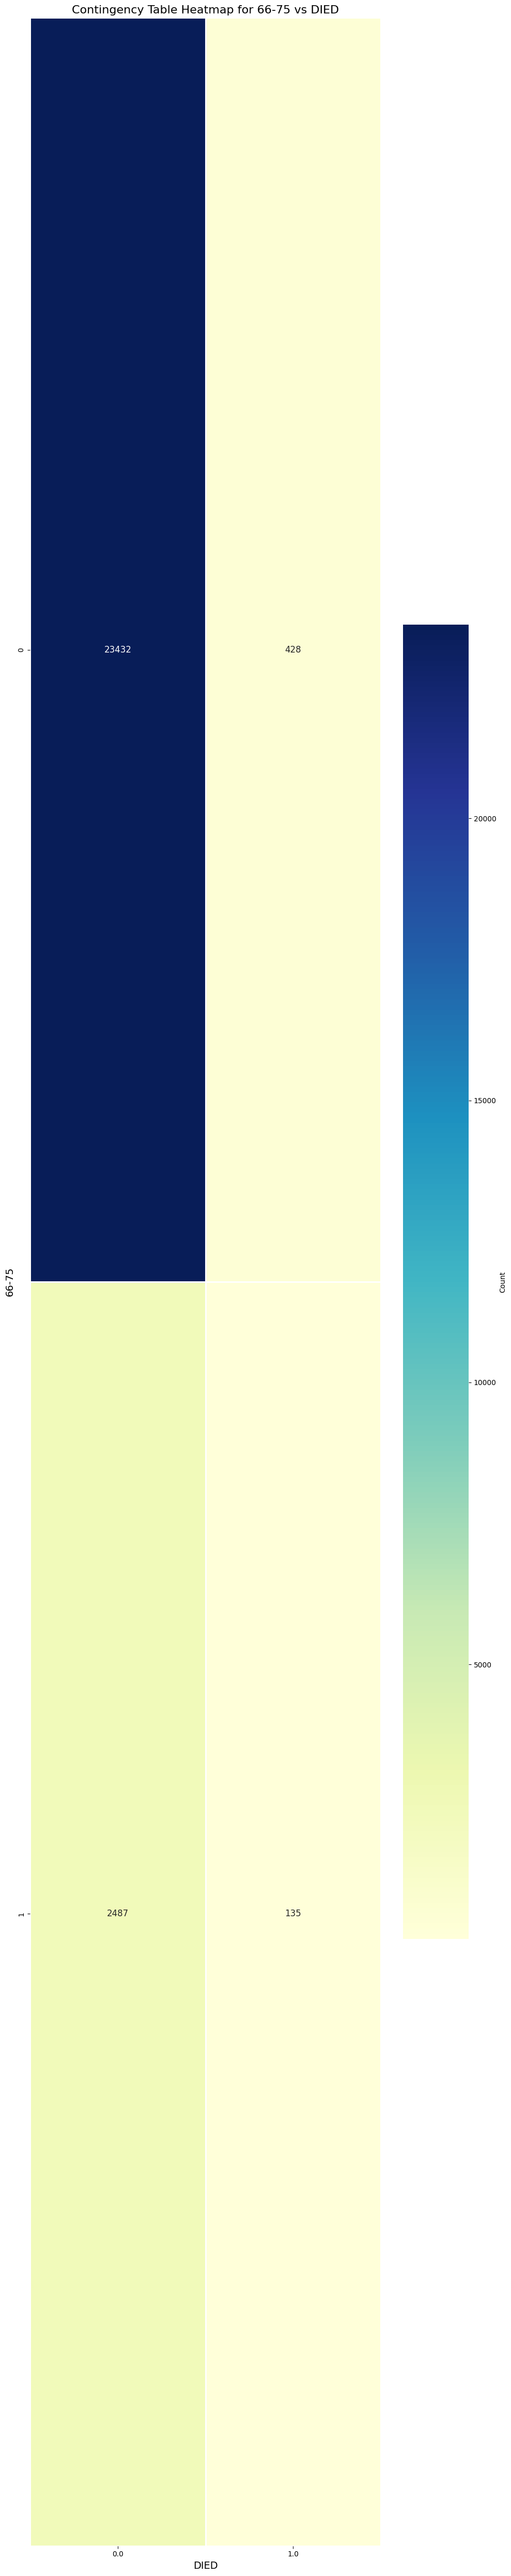

Symptom: 66-75
Chi-Square Statistic: 126.18303306053022
P-value: 2.8039223323017023e-29
Degrees of Freedom: 1
--------------------------------------------------


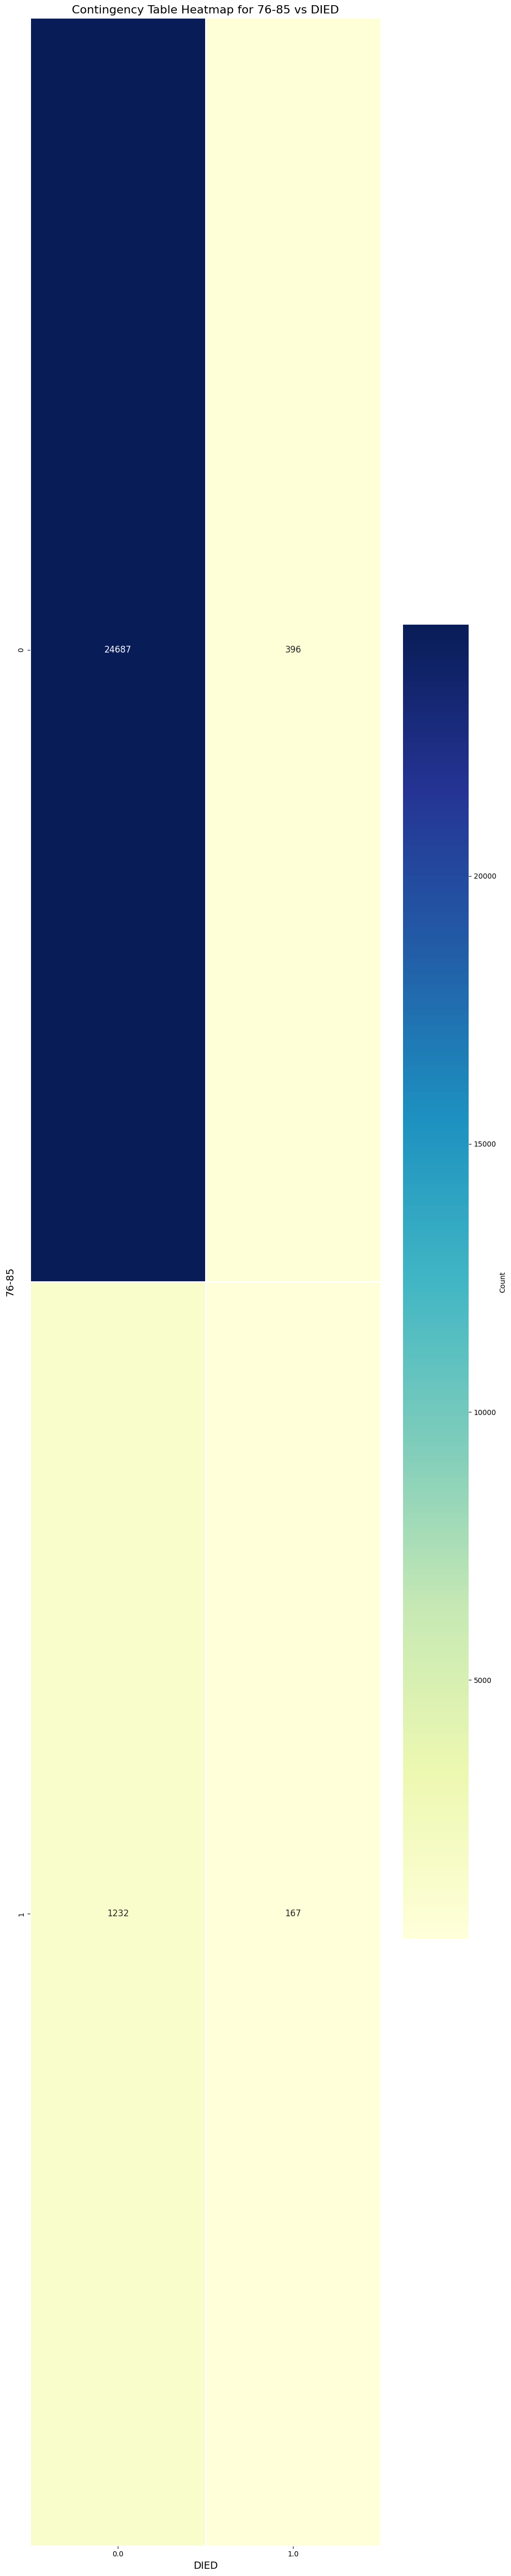

Symptom: 76-85
Chi-Square Statistic: 678.3155175863426
P-value: 1.5532563404794056e-149
Degrees of Freedom: 1
--------------------------------------------------


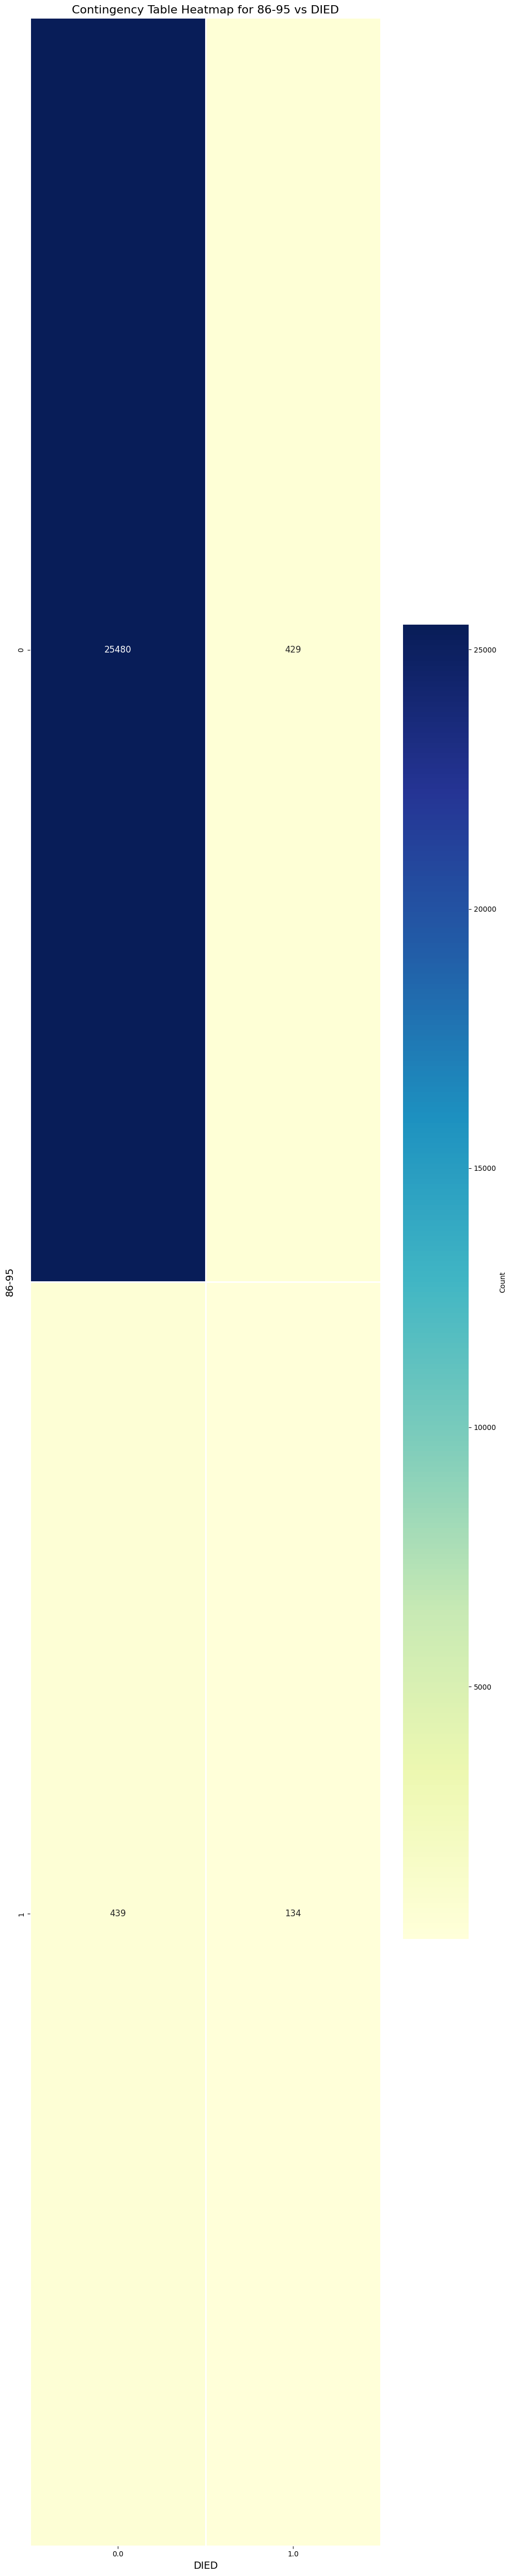

Symptom: 86-95
Chi-Square Statistic: 1261.746752227631
P-value: 2.3242584373145297e-276
Degrees of Freedom: 1
--------------------------------------------------


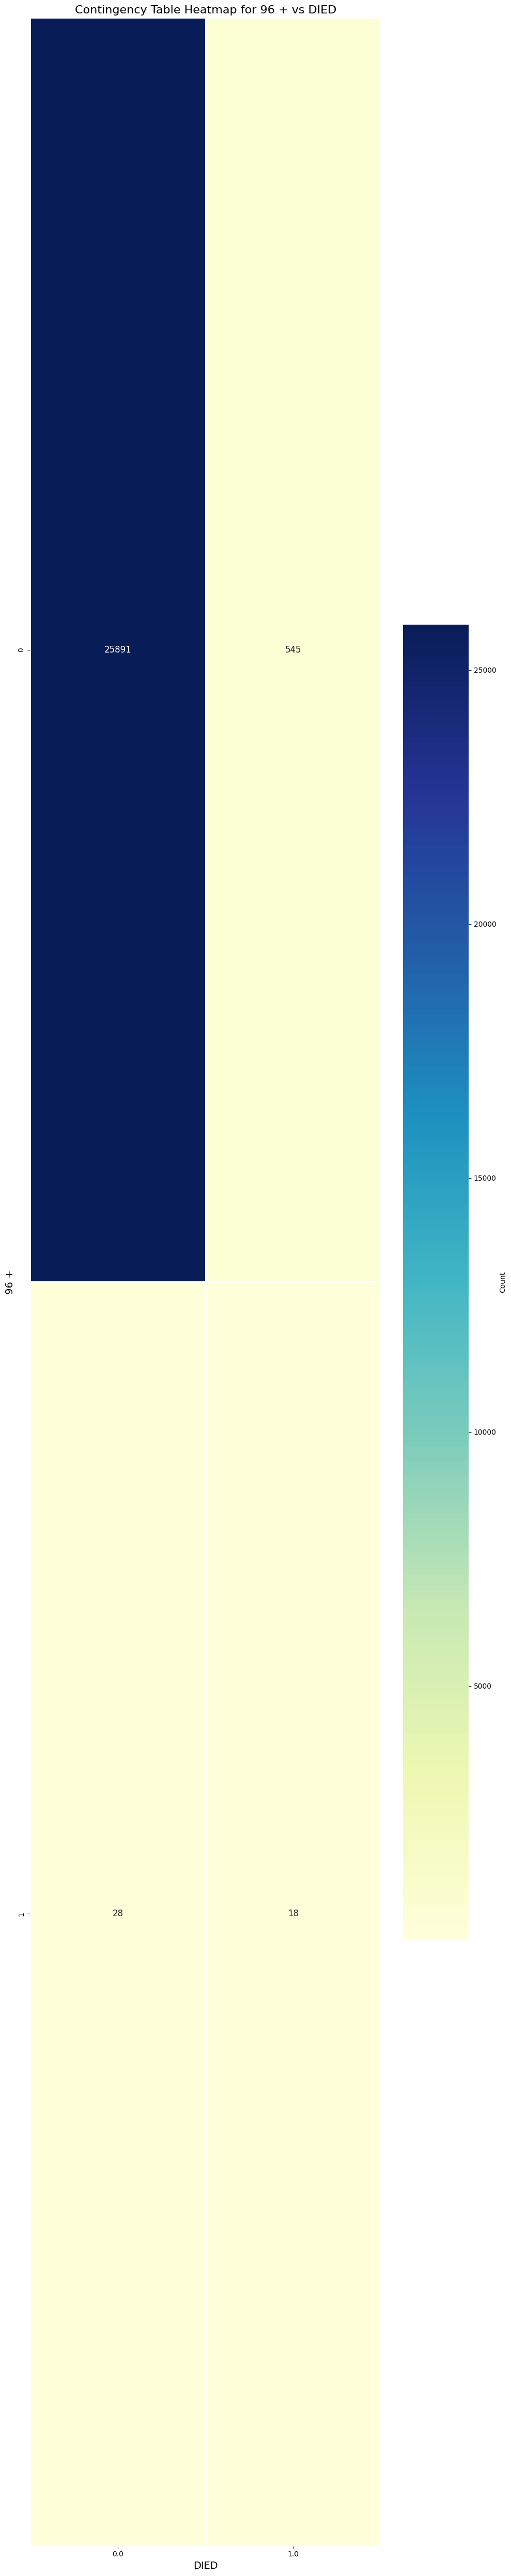

Symptom: 96 +
Chi-Square Statistic: 285.69335504772135
P-value: 4.314784610661571e-64
Degrees of Freedom: 1
--------------------------------------------------


In [12]:
chi_square_results = {}

for column in test_columns:
    contingency_table = pd.crosstab (df[column], df['DIED'])
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    plt.figure(figsize=(10, 50))  # Increase the figure size
    sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=1, cbar_kws={'label': 'Count'}, annot_kws={"size": 12})

    plt.title(f'Contingency Table Heatmap for {column} vs DIED', fontsize=16)
    plt.xlabel('DIED', fontsize=14)
    plt.ylabel(f'{column}', fontsize=14)

    plt.tight_layout()
    plt.show()
    
    
    chi_square_results[column] = {'Chi2 Statistic': chi2, 'p-value': p, 'Degrees of Freedom': dof}

    print(f"Symptom: {column}")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print('-' * 50)

# Interpreting Results

In [15]:
related_columns = []
unrelated_columns = []

In [16]:
alpha = 0.05
for column, result in chi_square_results.items():
    if result['p-value'] < alpha:
        related_columns.append(column)
        print(f"{column}: Significant association (p-value: {result['p-value']})")
    else:
        unrelated_columns.append(column)
        print(f"{column}: No significant association (p-value: {result['p-value']})")

SYMPTOM: Significant association (p-value: 0.0)
ASSIGNED_GROUP: Significant association (p-value: 0.0)
SEVERITY_LEVEL: Significant association (p-value: 0.0)
L_THREAT: No significant association (p-value: 0.5298903734322212)
HOSPITAL: Significant association (p-value: 4.5380897253535985e-39)
AGE_YRS: Significant association (p-value: 0.0)
AGE_GROUP: Significant association (p-value: 0.0)
OTHER_MEDS: Significant association (p-value: 6.710746187350673e-06)
CUR_ILL: Significant association (p-value: 1.8481492886070554e-61)
HISTORY: Significant association (p-value: 1.8107905452459356e-21)
PRIOR_VAX: Significant association (p-value: 4.888834536054241e-06)
ALLERGIES: Significant association (p-value: 5.363823889550106e-06)
F: Significant association (p-value: 4.388412519605896e-111)
M: Significant association (p-value: 4.388412519605896e-111)
JANSSEN: Significant association (p-value: 2.660912981438105e-05)
MODERNA: No significant association (p-value: 0.8091102150521505)
PFIZER: No signi

In [17]:
print(f"The related columns are: \n {related_columns}")

The related columns are: 
 ['SYMPTOM', 'ASSIGNED_GROUP', 'SEVERITY_LEVEL', 'HOSPITAL', 'AGE_YRS', 'AGE_GROUP', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'ALLERGIES', 'F', 'M', 'JANSSEN', 'VAX_DOSE_SERIES_1', 'VAX_DOSE_SERIES_2', 'VAX_SITE_LA', 'VAX_SITE_RA', '18-25', '26-35', '36-45', '46-55', '66-75', '76-85', '86-95', '96 +']


In [18]:
print(f"The unrelated columns are: \n {unrelated_columns}")

The unrelated columns are: 
 ['L_THREAT', 'MODERNA', 'PFIZER', '56-65']
